## Predicting Rain 

Problem statement:  

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

A dataset that records 145460 the climate data in Australia which is given. The prediction of rain also are recorded along with some other attributes.

Objective: Following tasks are performed: EDA, Initial model fitting step ,Feature engineering ,Model fitting after feauture engineering. 

RainTomorrow is the target variable to predict. It means that did it rain the next day, Yes or No?
This column is Yes if the rain for that day was 1mm or more.

In [1]:
#Importing the required libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
pd.set_option('display.max_columns', None)
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
import warnings
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn import tree
warnings.simplefilter("ignore")
import os

In [2]:
# Reading the dataset:
dataset= pd.read_csv("weatherAUS.csv")
#number of rows and columns
dataset.shape

(145460, 23)

### 2. Exploratory data analysis:


In [3]:
#checking if the data has missing values or not.
dataset.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### Missing values are oberved in the dataset

In [4]:
# Analysing the CVDOT of the dataset
dataset.describe().T   #describing the dataset statistically

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [5]:
#Cheching the % of missing values in the dataset
dataset.isnull().sum()/len(dataset)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [6]:
# Removing the columns which has high missing values
dataset.drop(["Evaporation","Sunshine",'Cloud9am','Cloud3pm'], axis='columns', inplace=True)

In [7]:
#Removing features not effective:
dataset.drop(["Date","Location"], axis='columns', inplace=True)

In [8]:
dataset.head()  # Veiwing the dataset

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [9]:
#Seperating the categorical variables for further EDA
df_num = dataset.select_dtypes('float64')
df_cat = dataset.select_dtypes('object')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustSpeed  135197 non-null  float64
 4   WindSpeed9am   143693 non-null  float64
 5   WindSpeed3pm   142398 non-null  float64
 6   Humidity9am    142806 non-null  float64
 7   Humidity3pm    140953 non-null  float64
 8   Pressure9am    130395 non-null  float64
 9   Pressure3pm    130432 non-null  float64
 10  Temp9am        143693 non-null  float64
 11  Temp3pm        141851 non-null  float64
dtypes: float64(12)
memory usage: 13.3 MB


In [10]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   WindGustDir   135134 non-null  object
 1   WindDir9am    134894 non-null  object
 2   WindDir3pm    141232 non-null  object
 3   RainToday     142199 non-null  object
 4   RainTomorrow  142193 non-null  object
dtypes: object(5)
memory usage: 5.5+ MB


### Missing Values Imputation

In [11]:
# Missing Values inspection
df_num.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
# Replacing the misssing values using the median value in the feature for the numerical variables:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
df_num = pd.DataFrame(imputer.fit_transform(df_num), columns = df_num.columns)

# Replacing the misssing values using the mode on the feature for the categorical variables:
cat_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_cat = pd.DataFrame(cat_imputer.fit_transform(df_cat), columns = df_cat.columns)

In [13]:
#Checking for the missing values: 
df_num.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [14]:
#Checking for the missing values:
df_cat.isna().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [15]:
#Combining the seperated dataframes 
df = pd.concat([df_cat, df_num], axis = 1, join = 'inner')
df.head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,W,W,WNW,No,No,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,WNW,NNW,WSW,No,No,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,WSW,W,WSW,No,No,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,NE,SE,E,No,No,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,W,ENE,NW,No,No,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


### EDA and  Data manipulation :

#### Univariate analysis 

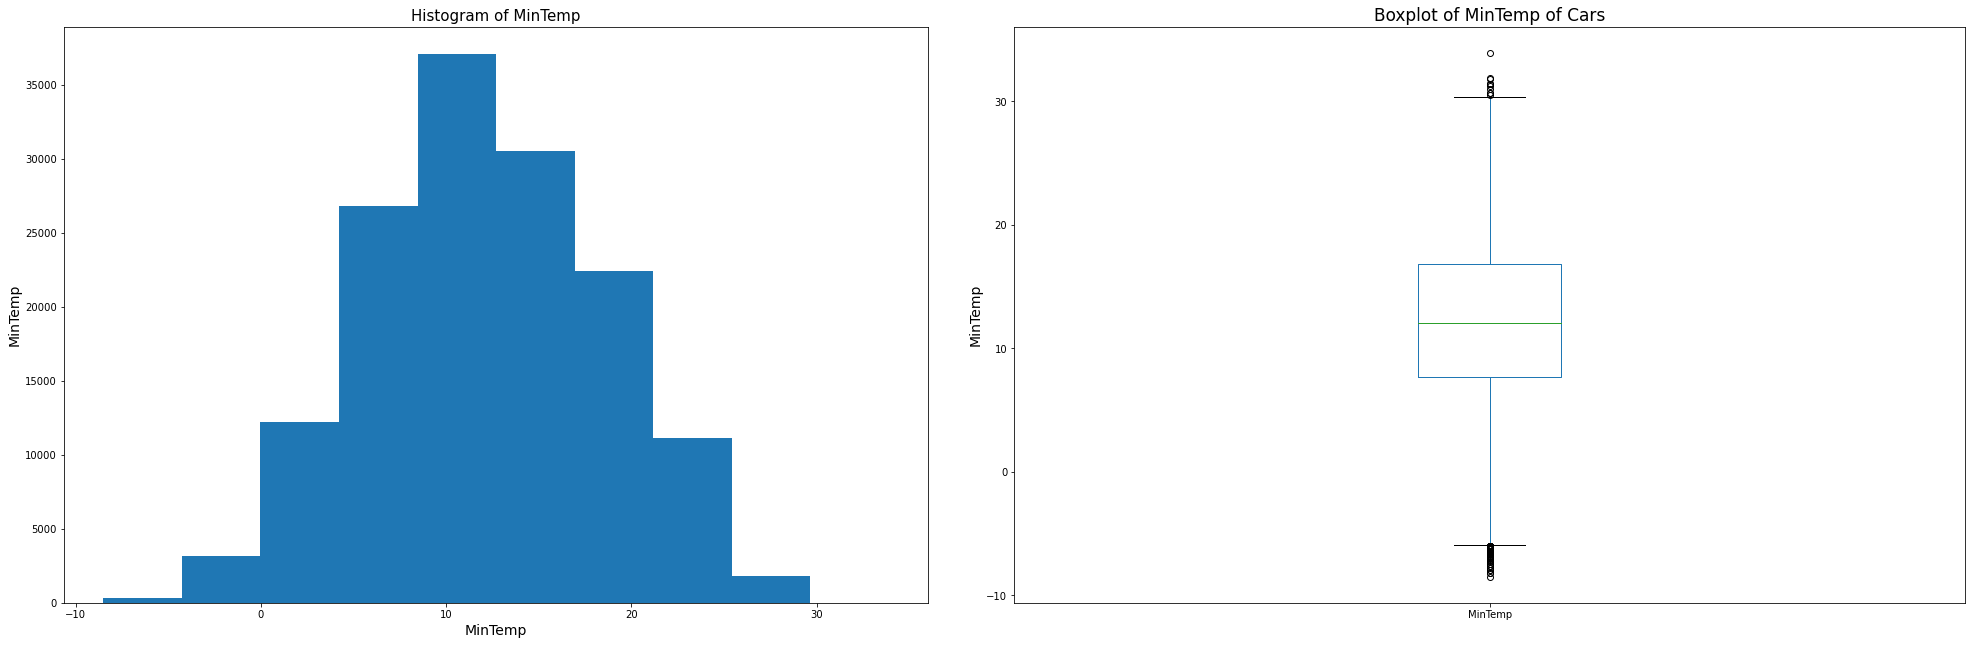

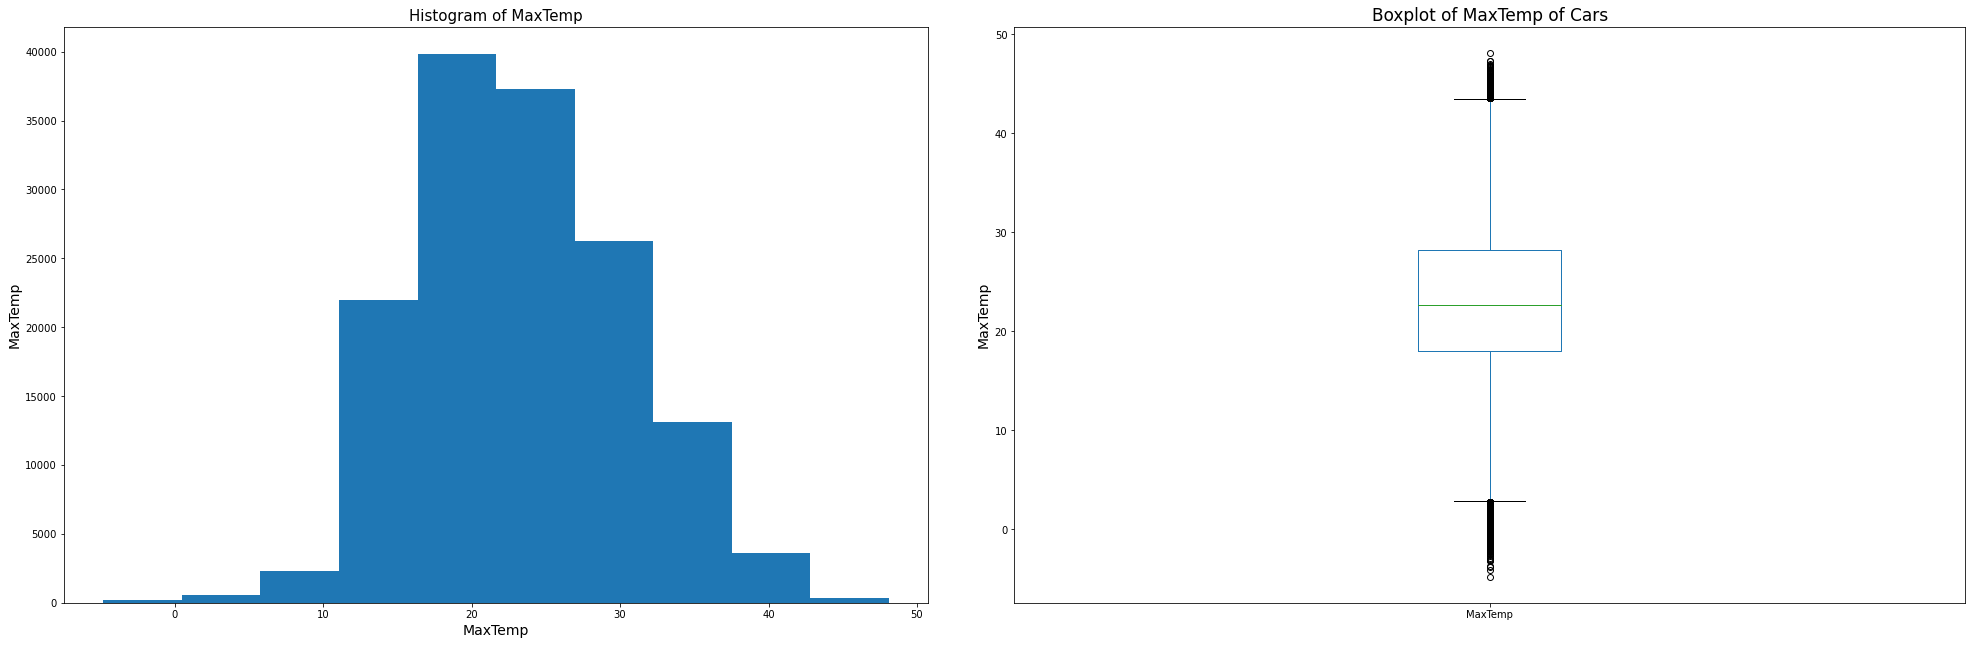

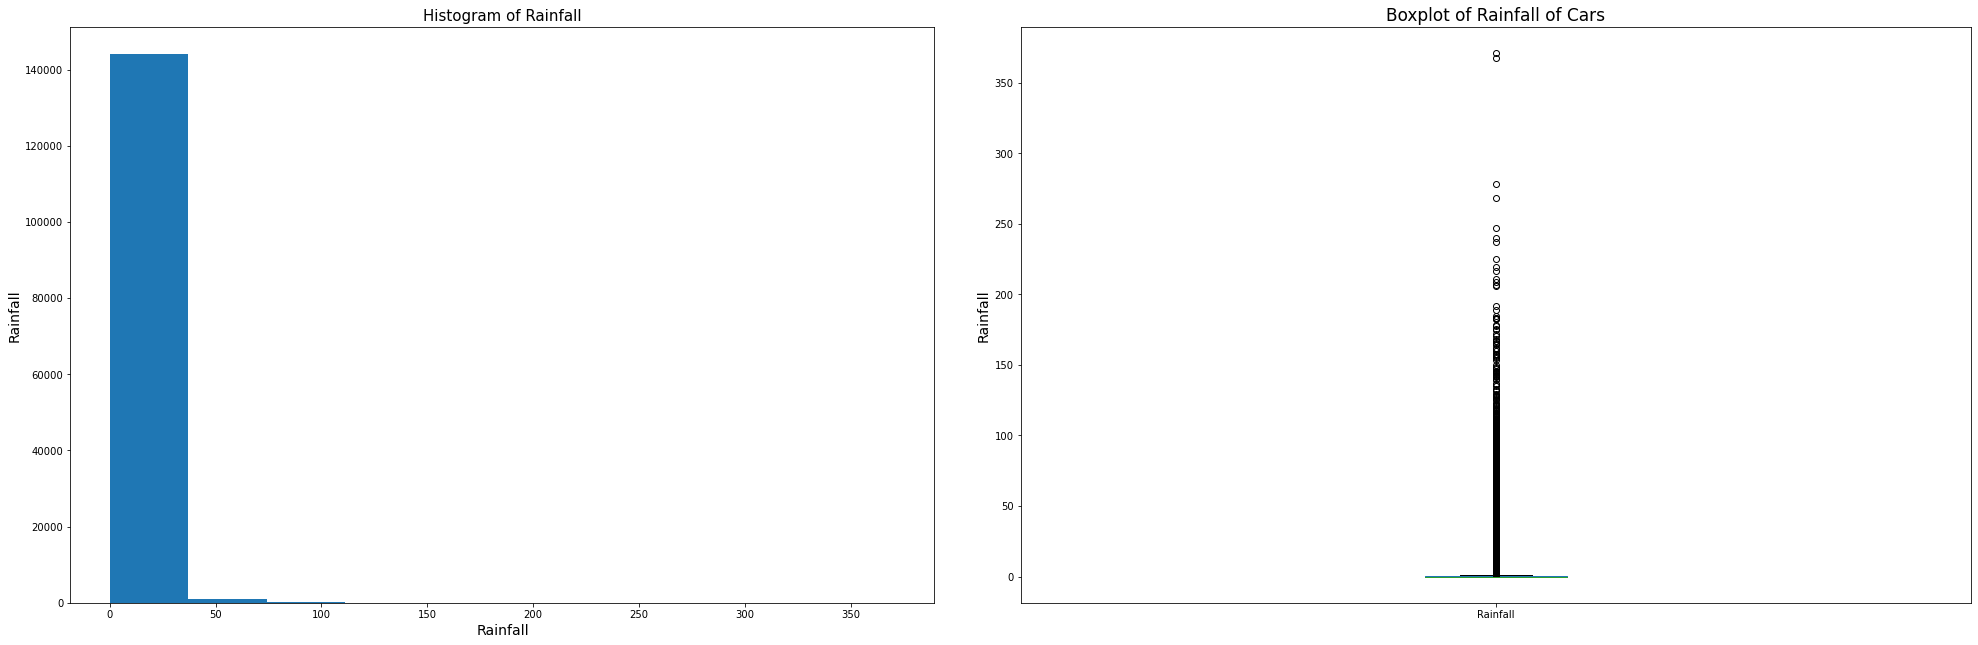

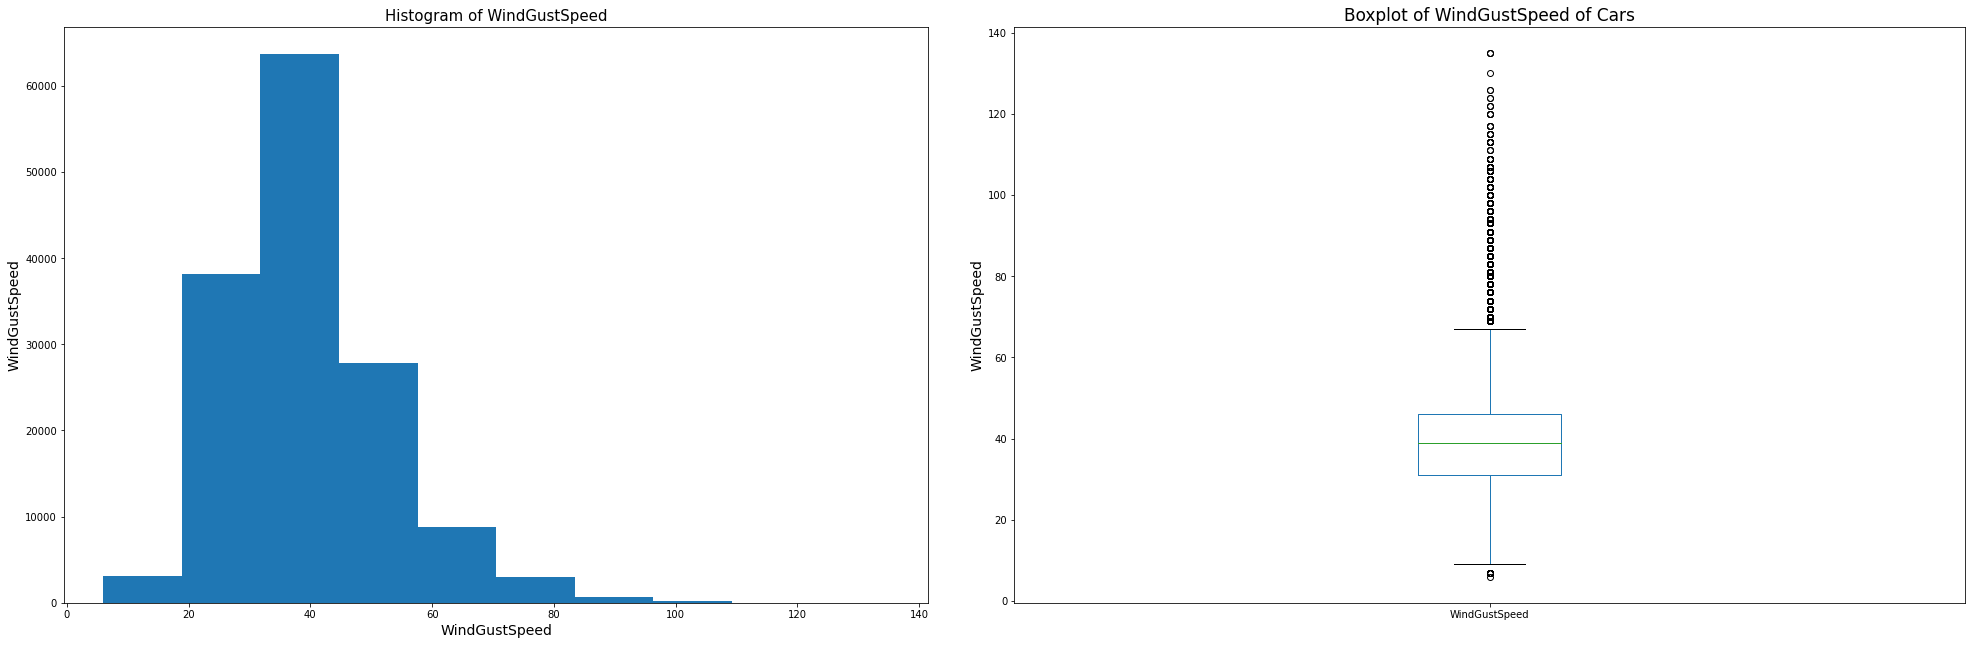

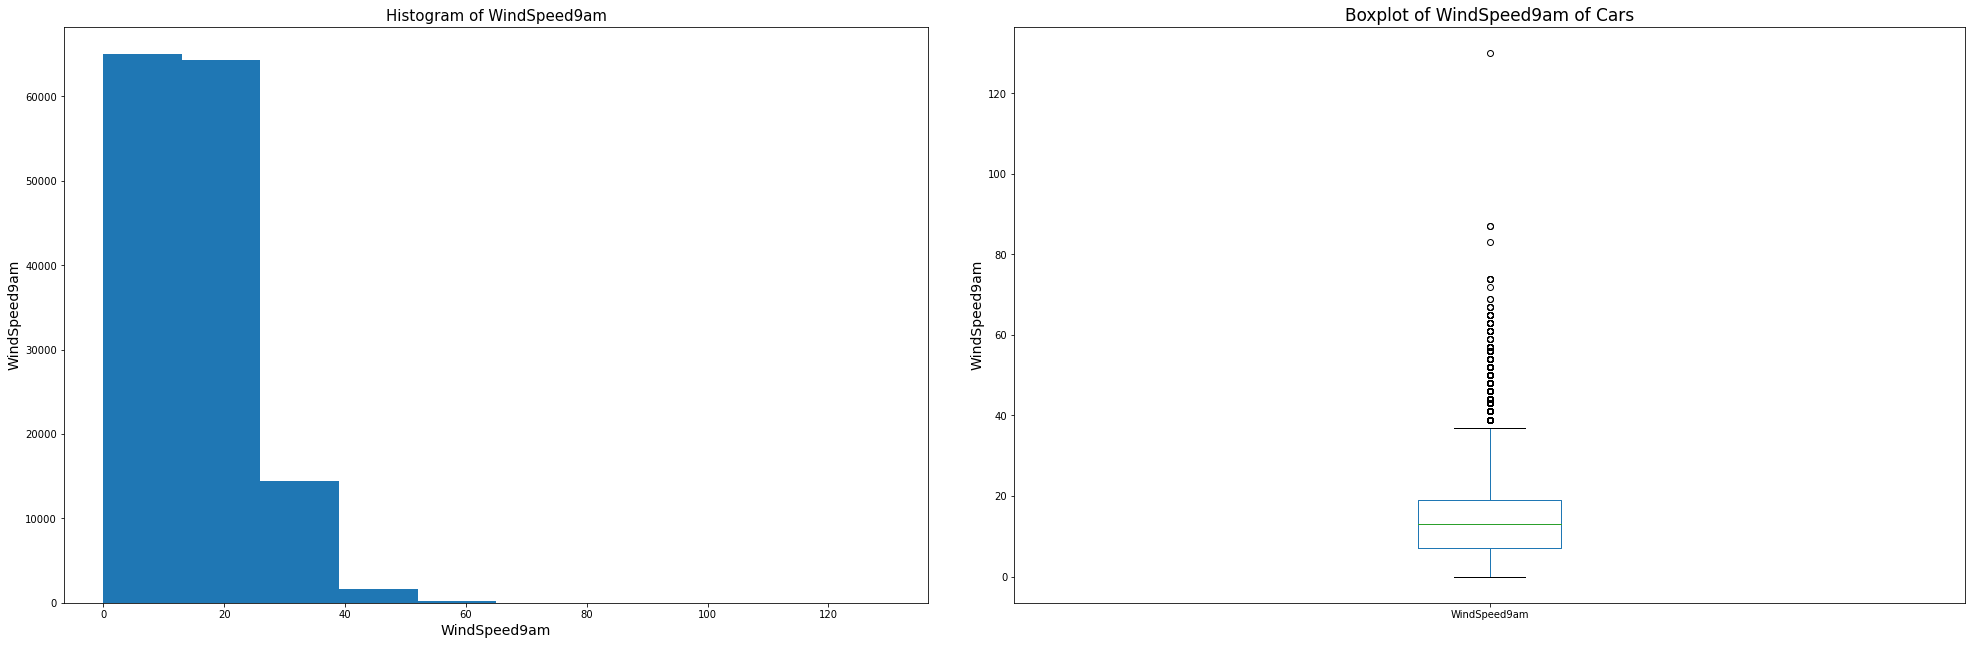

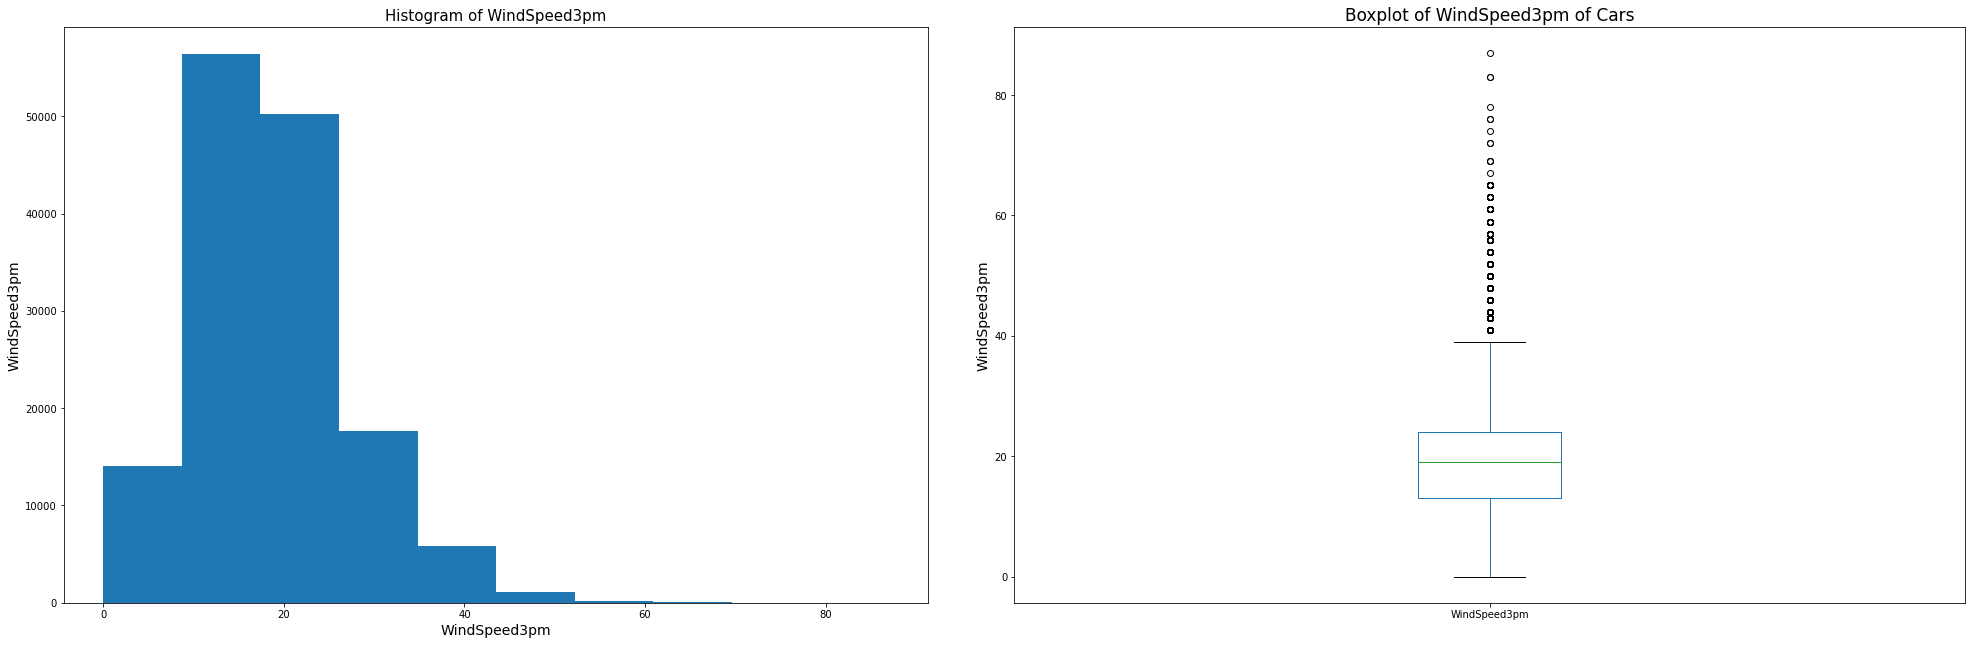

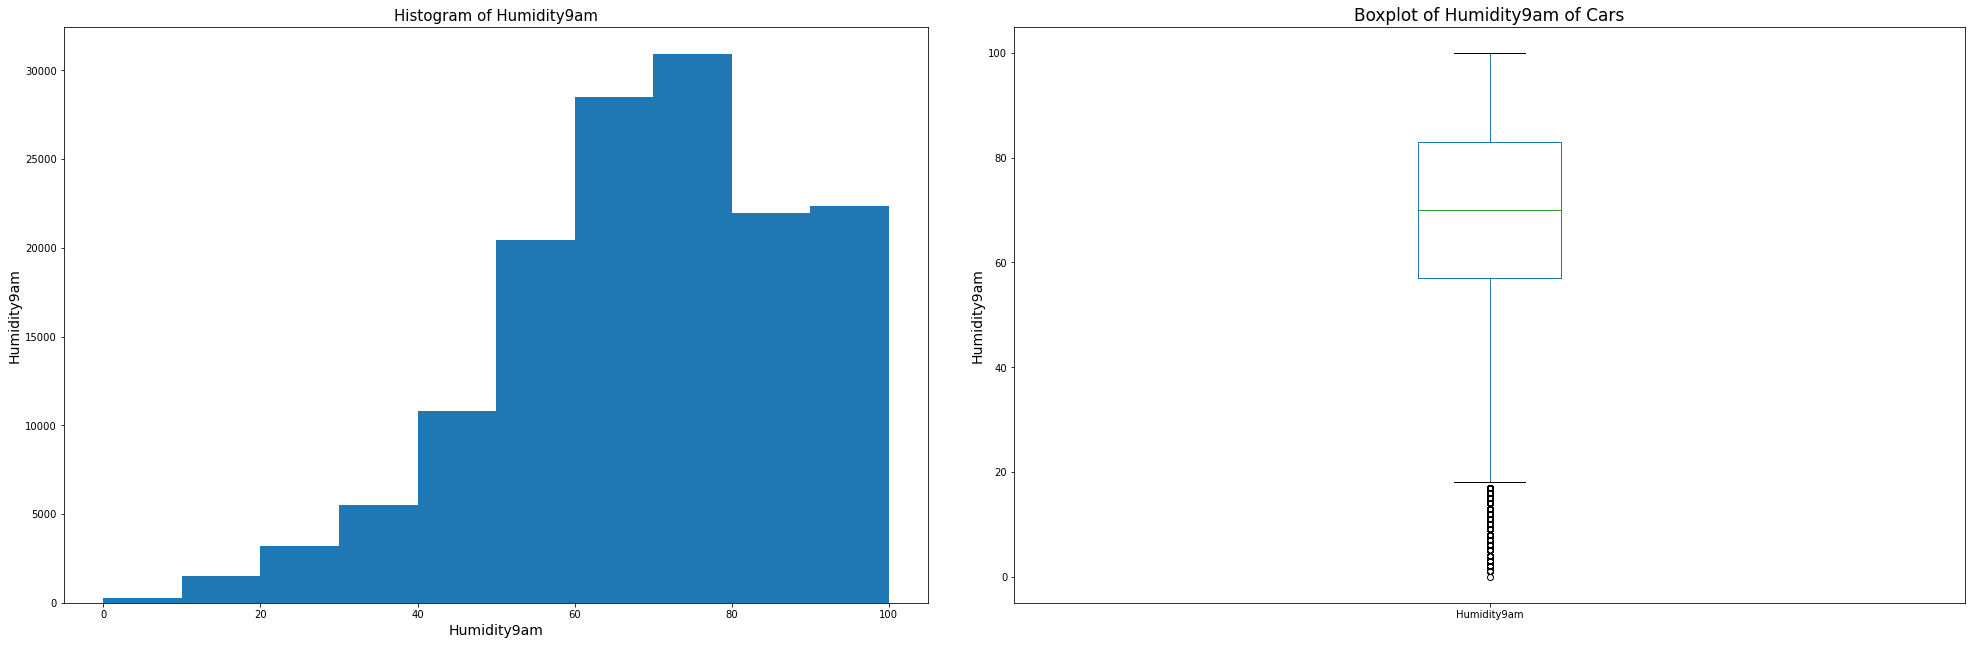

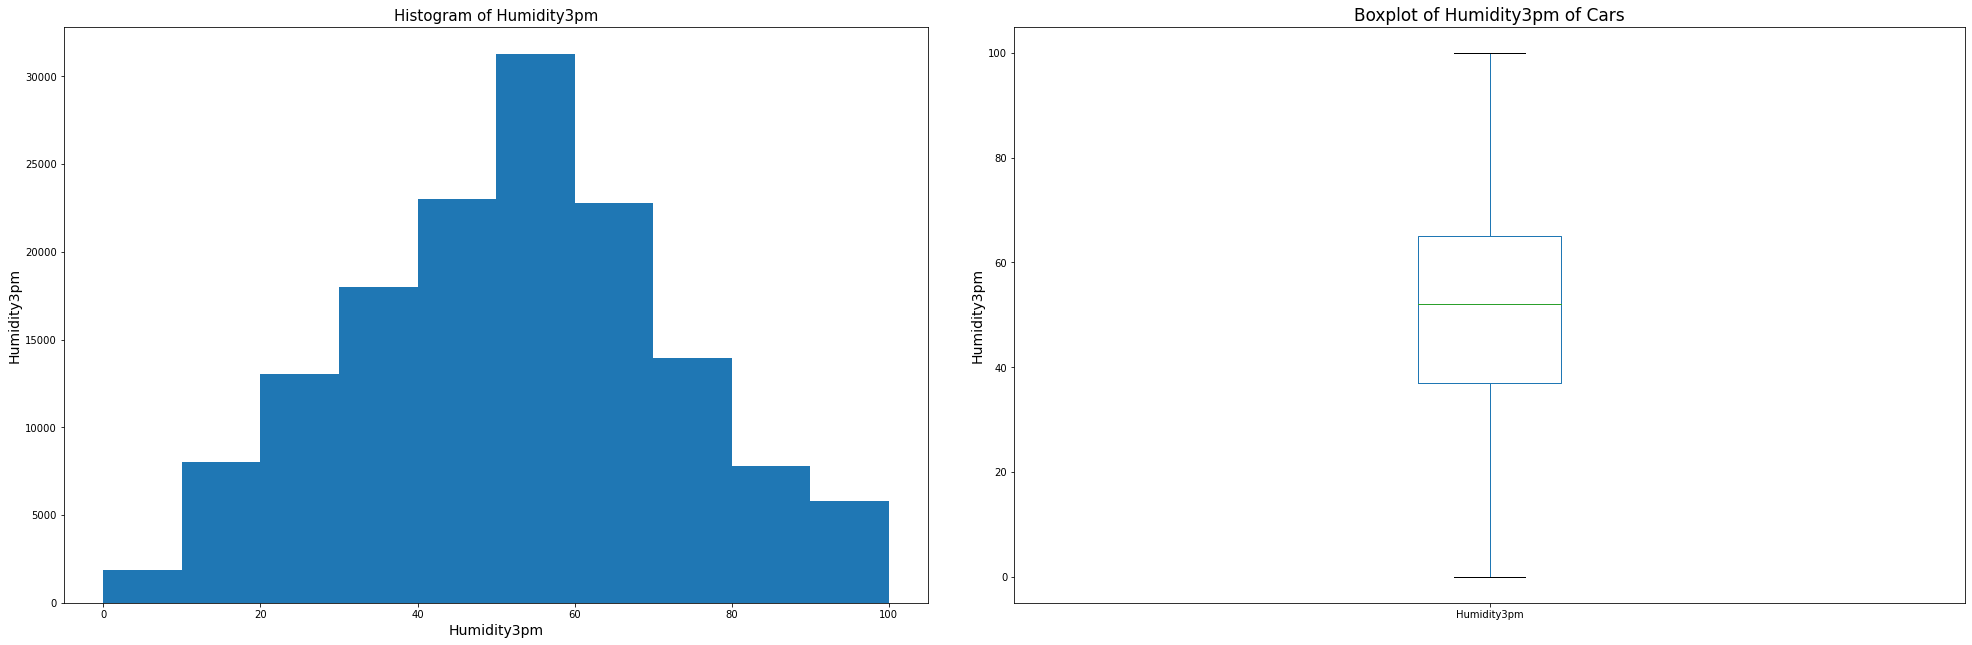

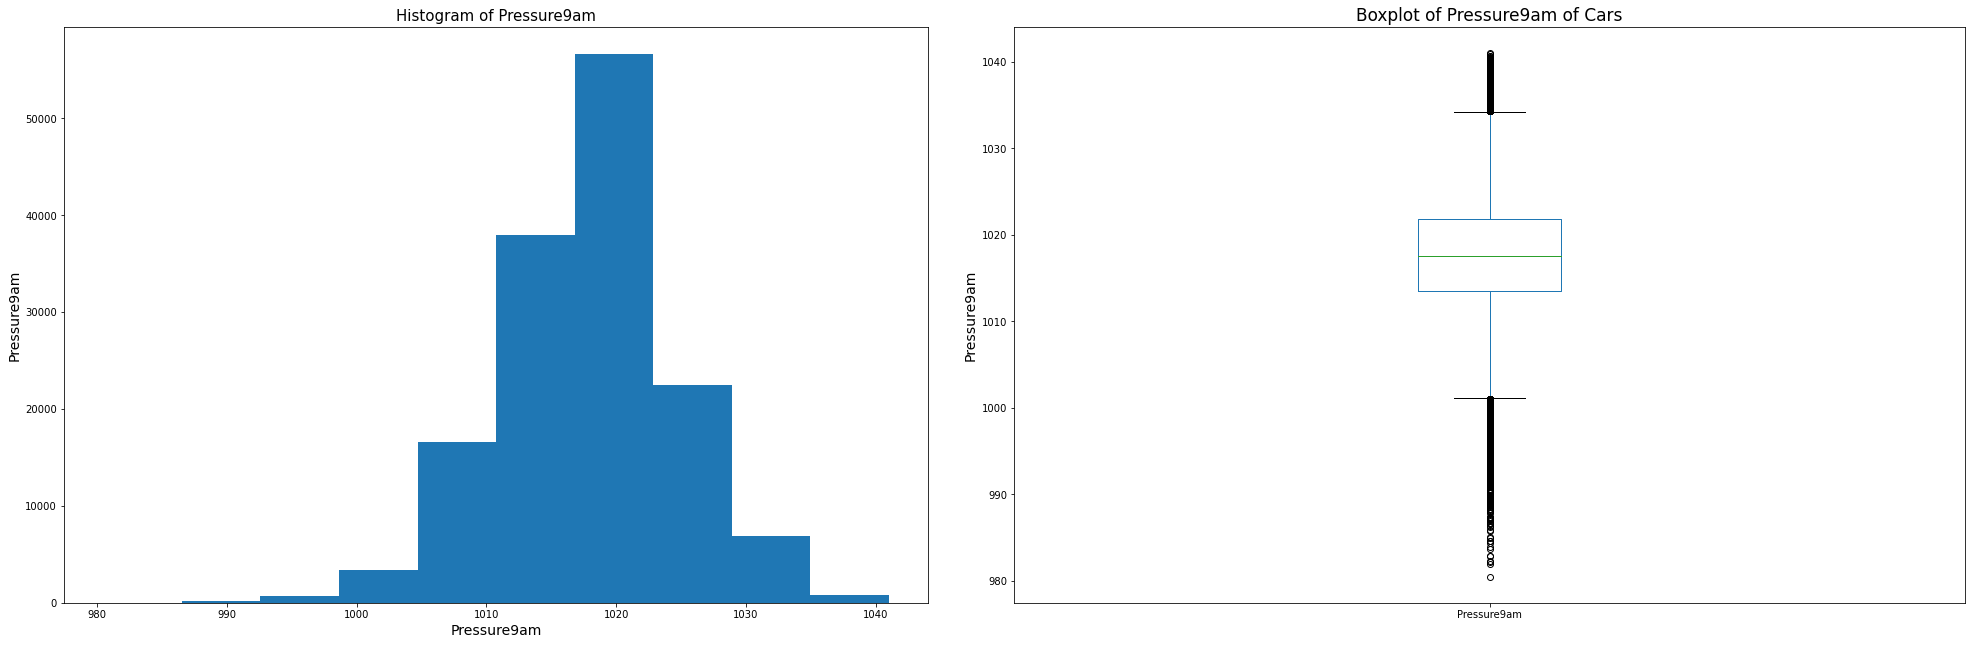

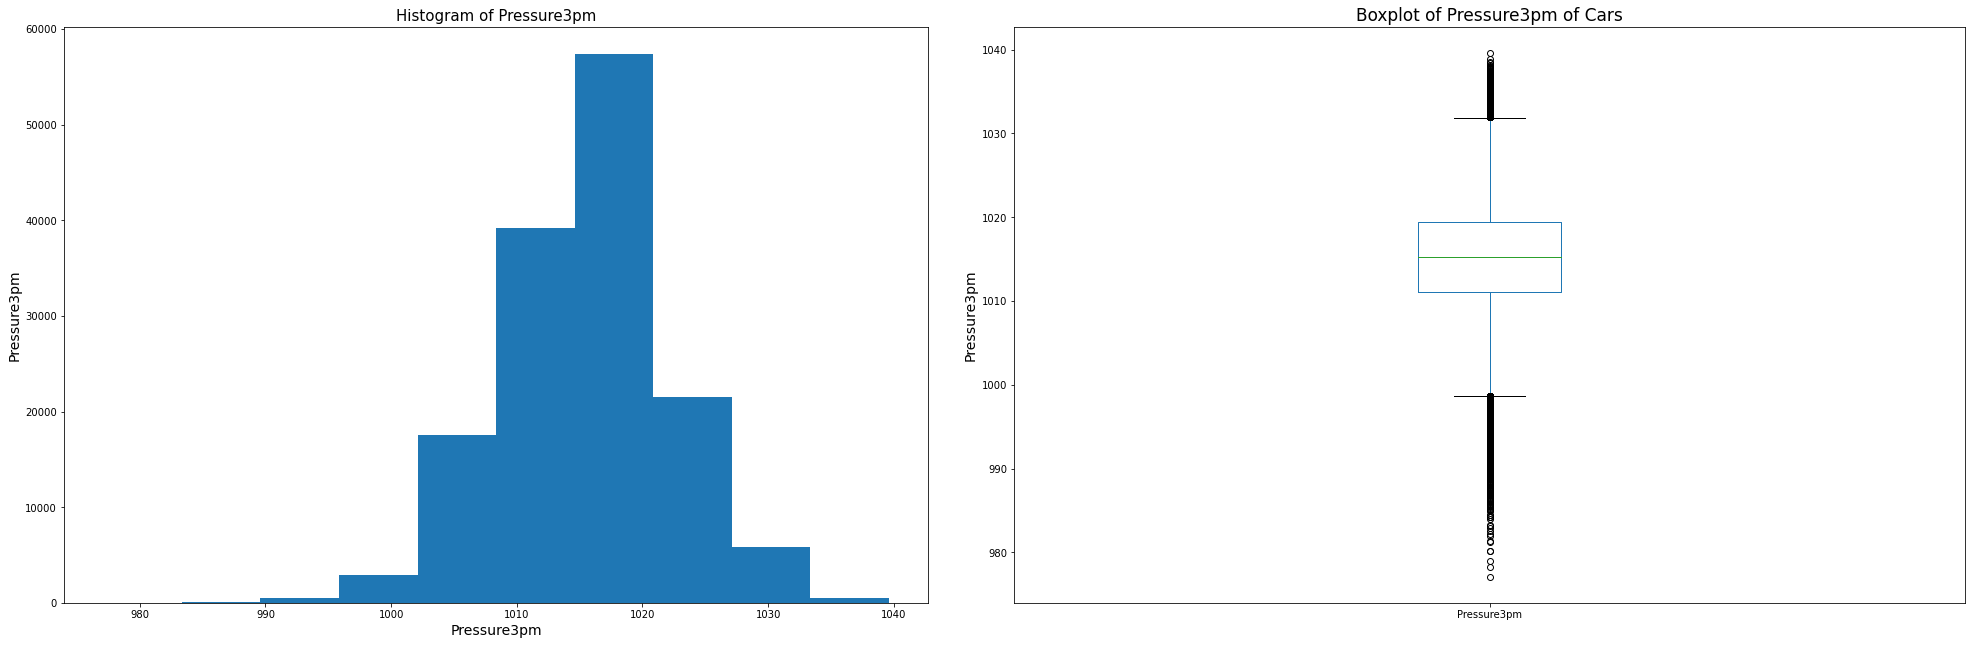

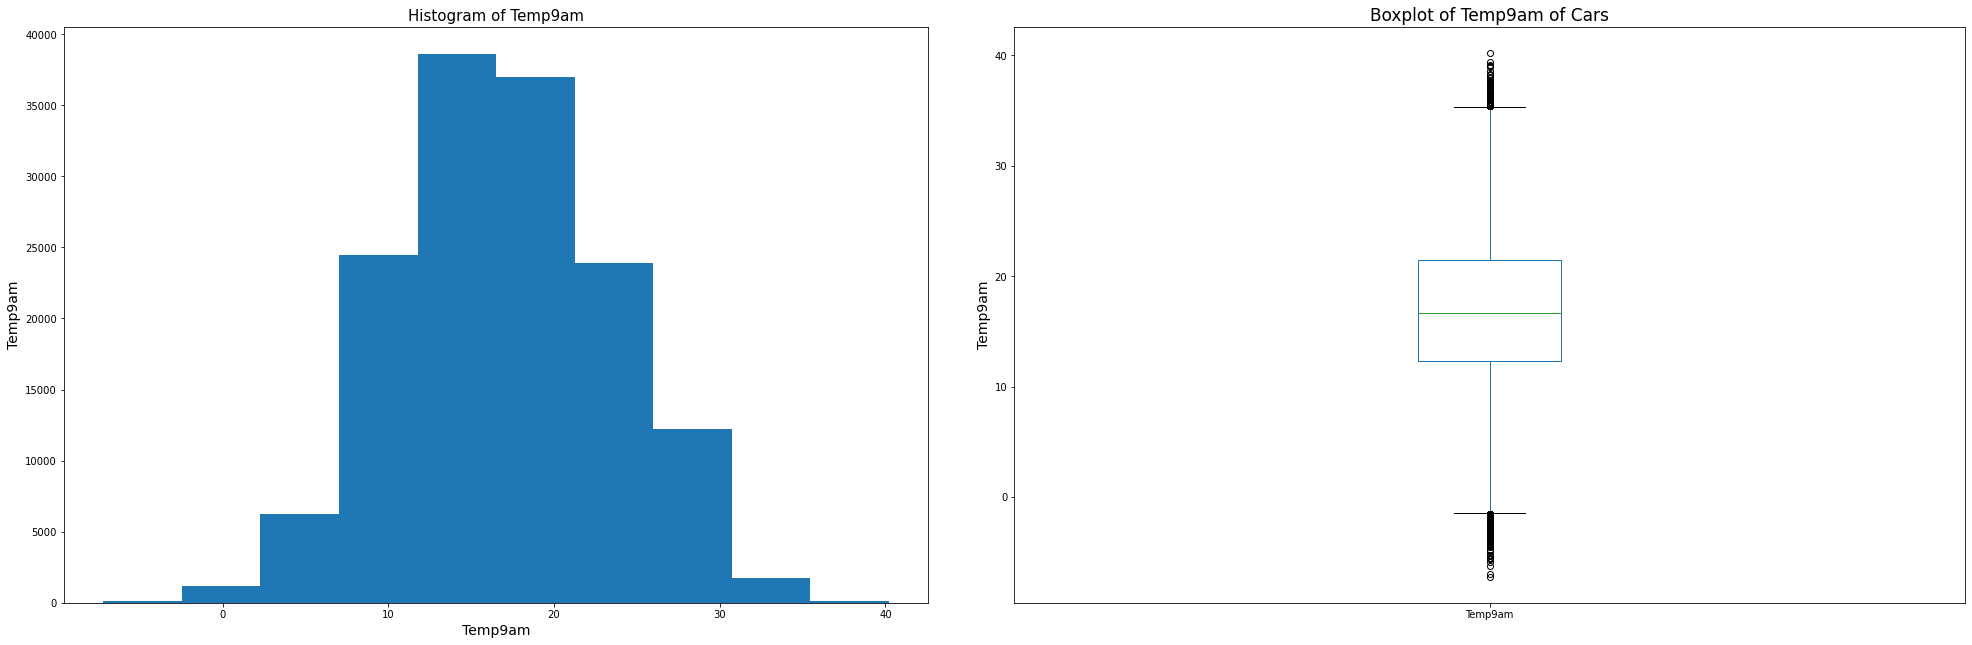

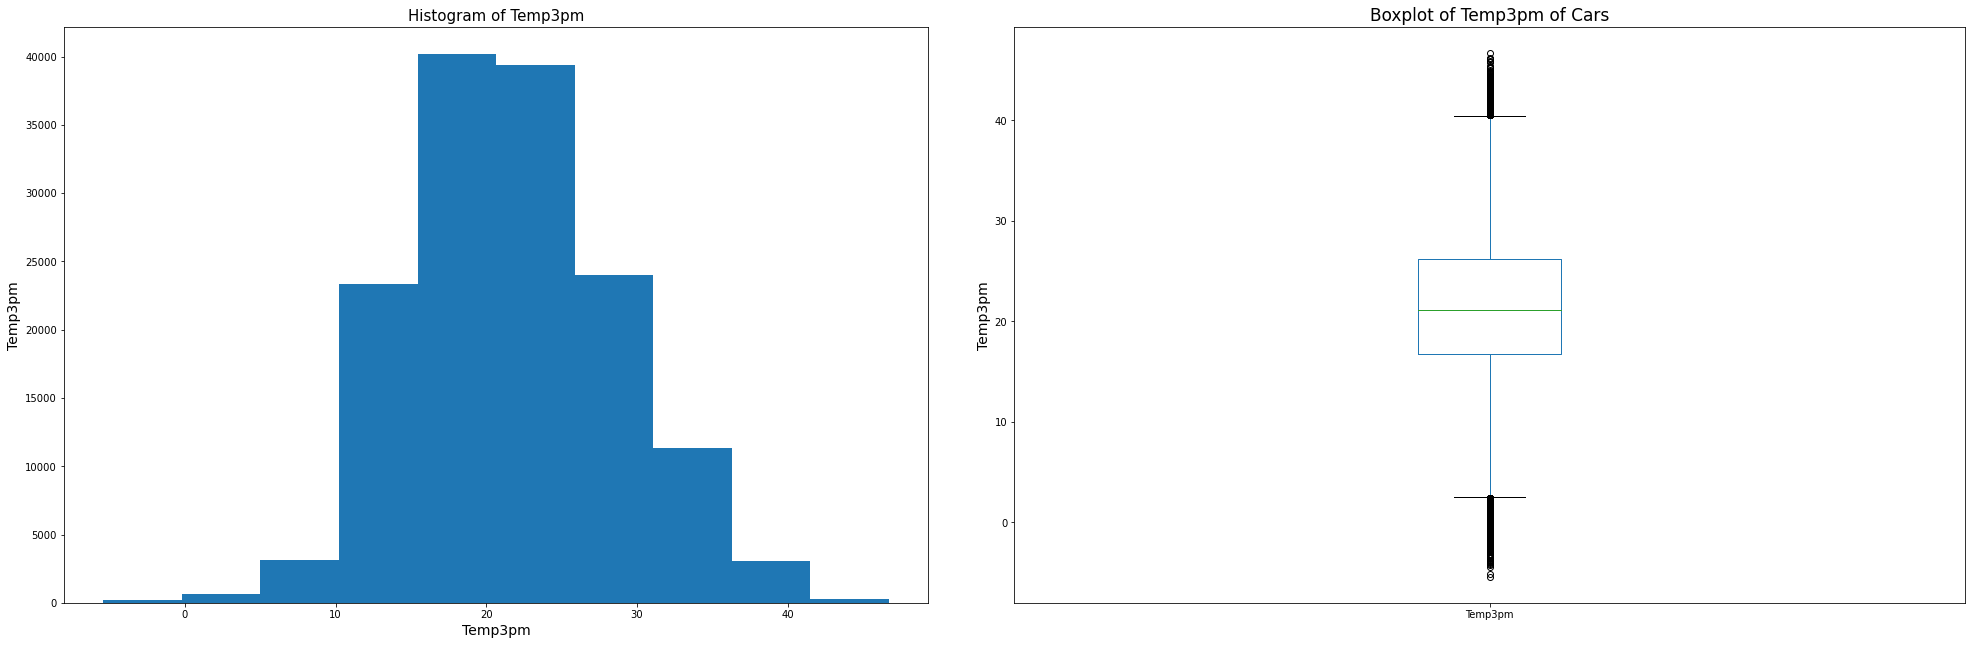

In [16]:
#plotting the histogram and boxplot for numericals:
for j in list(df_num.columns):
        figure= plt.figure()
    
        axes1 = figure.add_axes([0, 0, 2, 2]) 
        axes2 = figure.add_axes([2.2, 0, 2.2, 2]) 

        df.hist(column=j,grid=False,figsize=(6,4),ax=axes1)
        axes1.set_title("Histogram of "+str(j), fontsize=15)         #Titile for the plot
        axes1.set_xlabel(j, fontsize=14)                                      #Axis name for x axis
        axes1.set_ylabel(str(j), fontsize=14)                                         #Axis name for y axis

        df.boxplot(column=j ,grid=False, figsize=(6,4),ax=axes2)   #To flip the figure horizondally
        axes2.set_title("Boxplot of "+str(j)+" of Cars", fontsize=17)
        axes2.set_ylabel(str(j), fontsize=14)

Outliers are observed in the feautures of rainfall and windspeed. Hence they are to be removed

In [17]:
#removing the outlier
df= df[df.Rainfall != max(df.Rainfall)] 
df= df[df.Rainfall != max(df.Rainfall)] 
df= df[df.WindSpeed9am != min(df.WindSpeed9am)] 

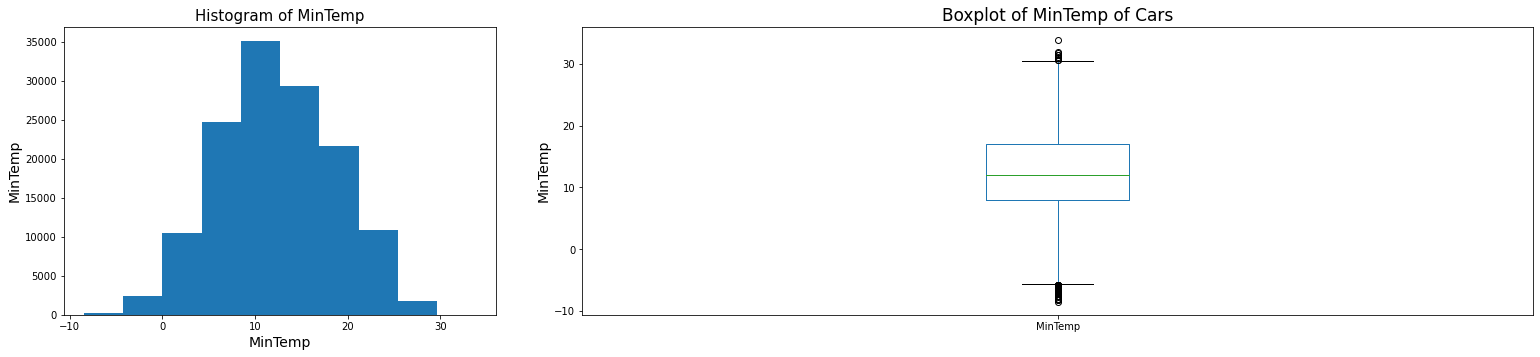

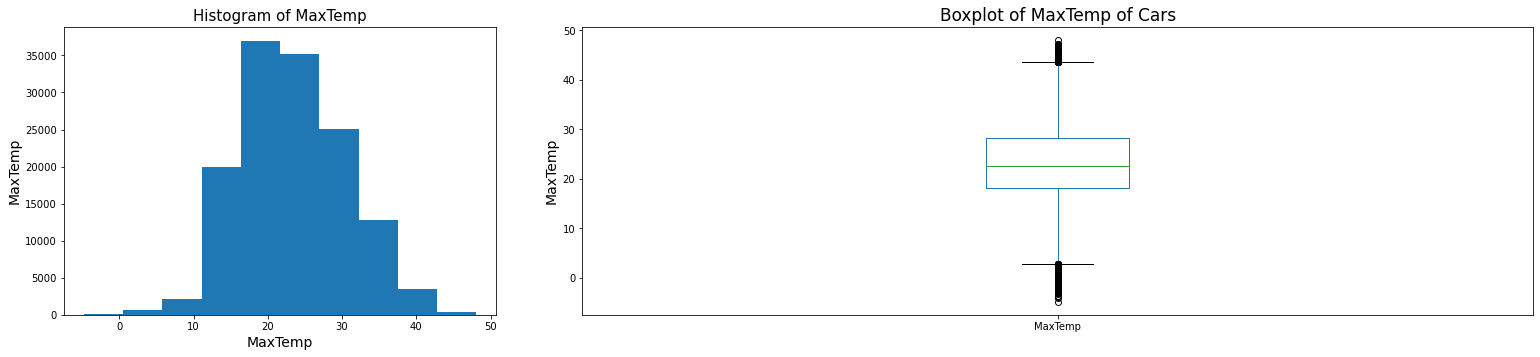

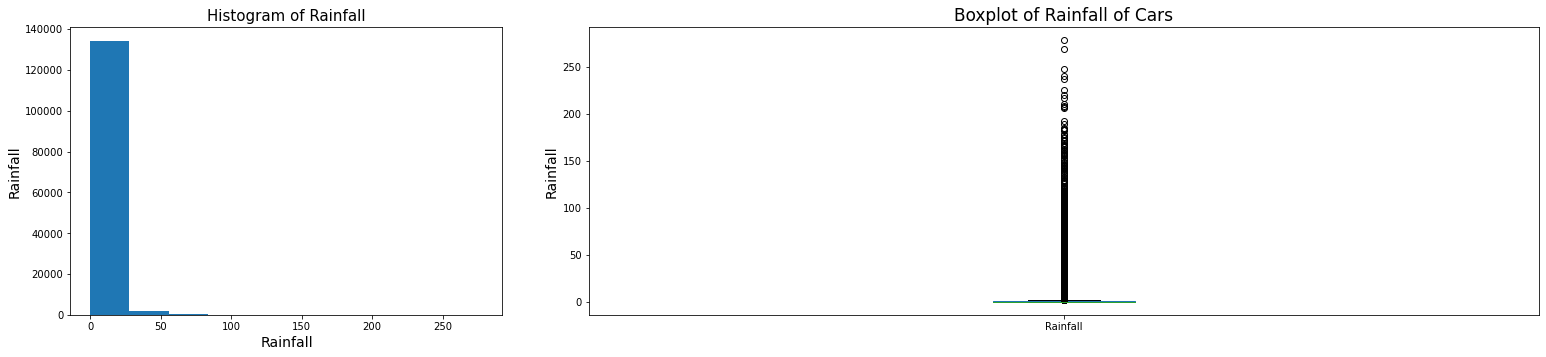

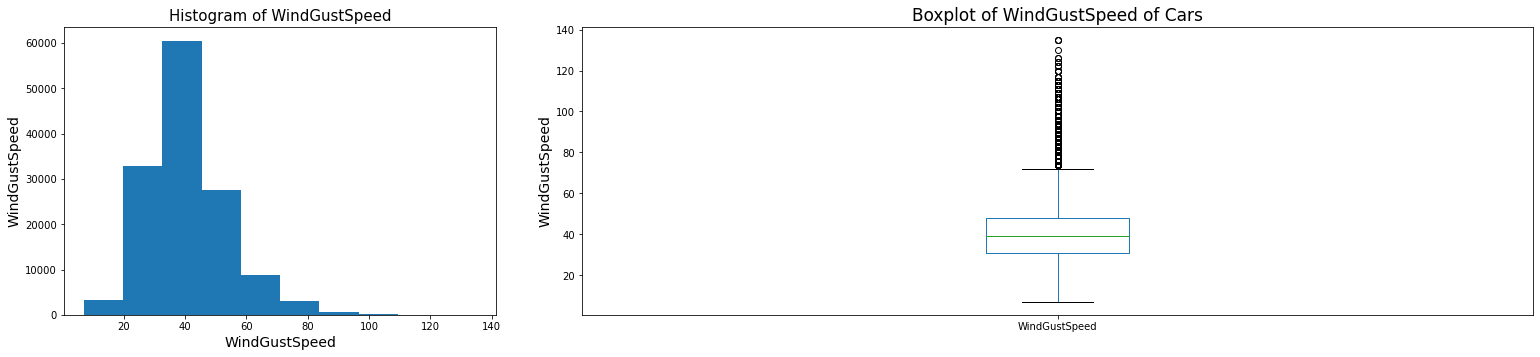

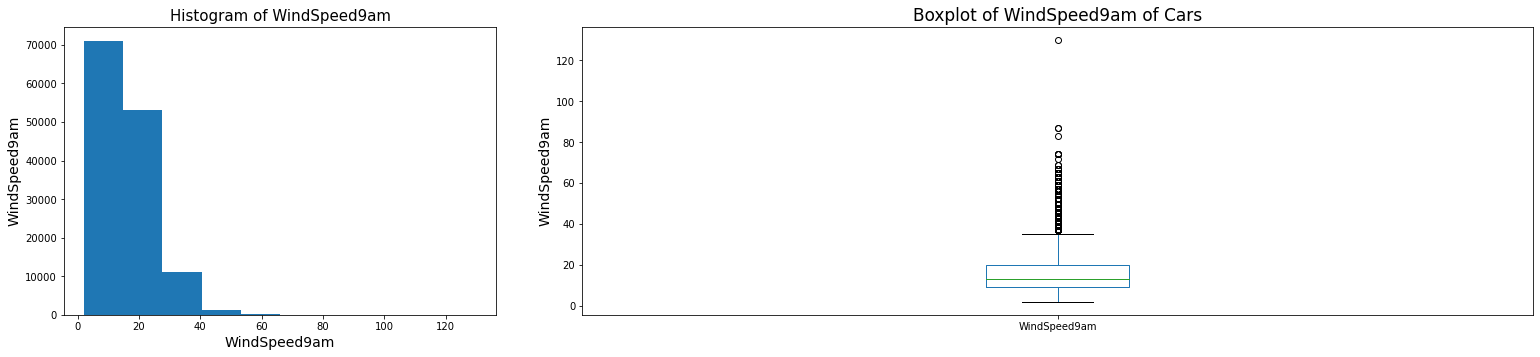

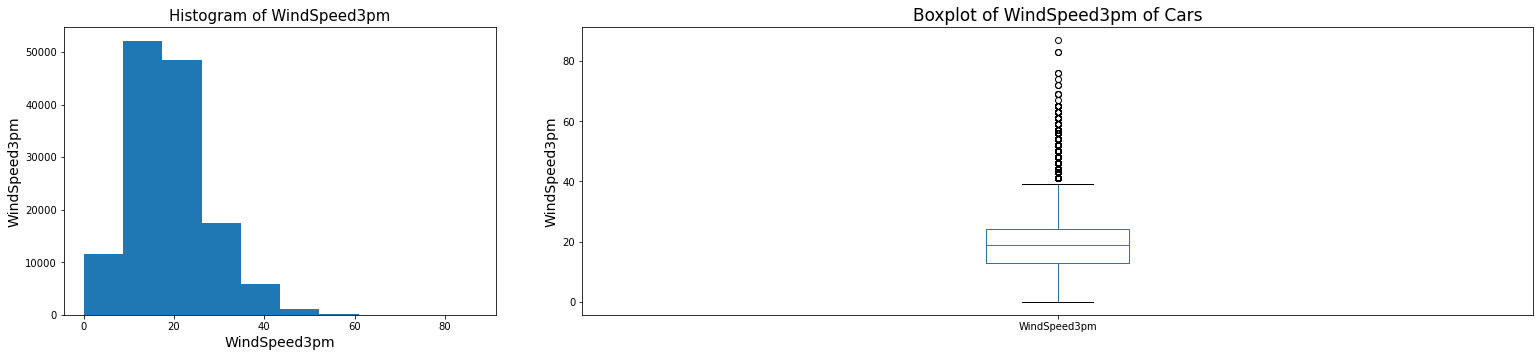

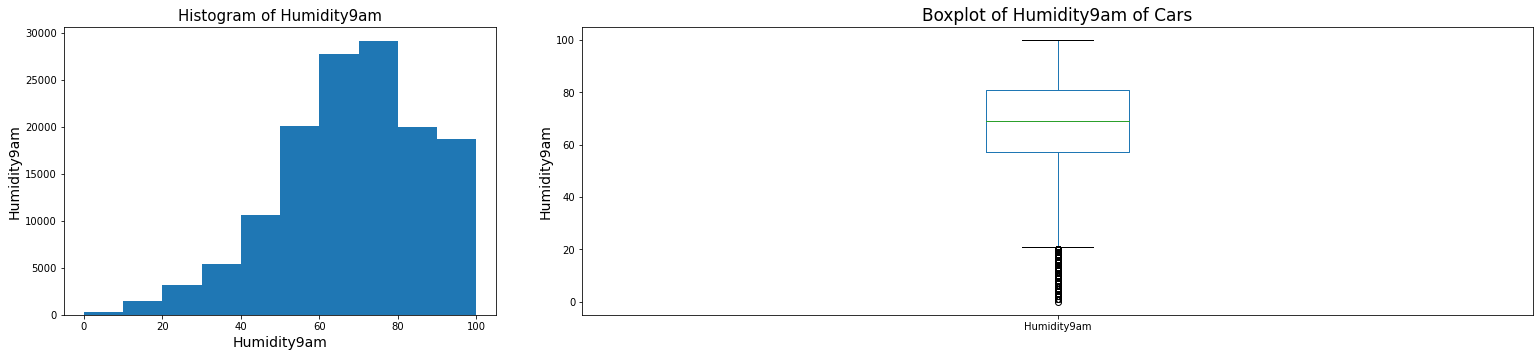

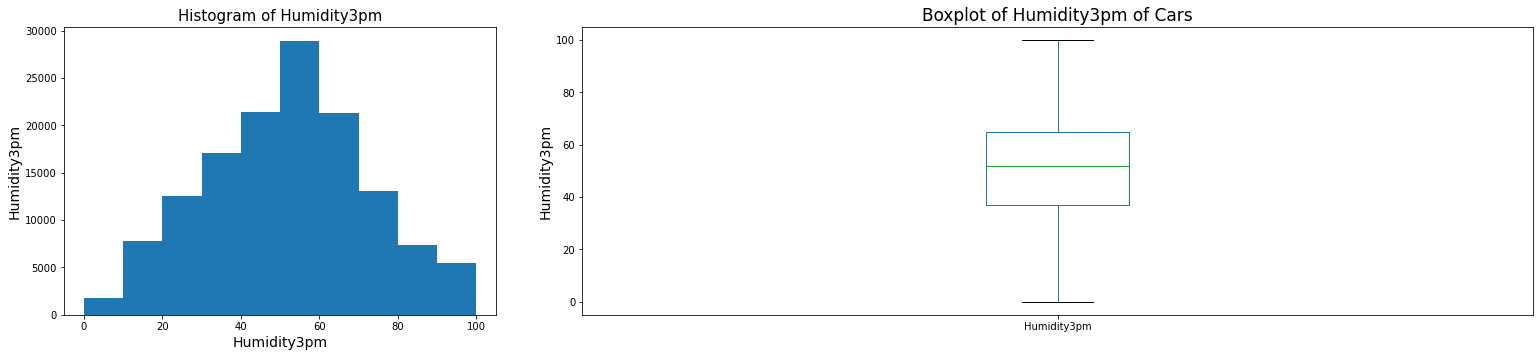

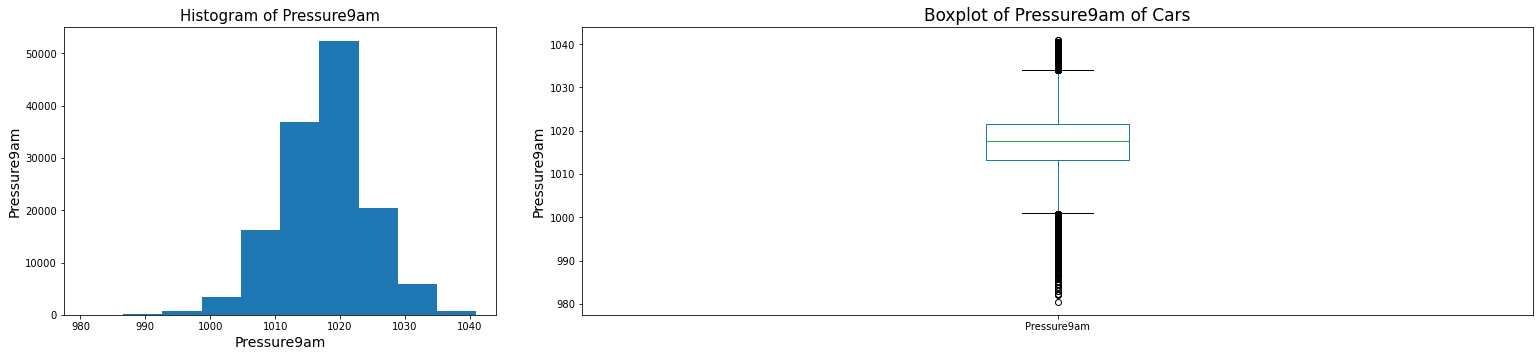

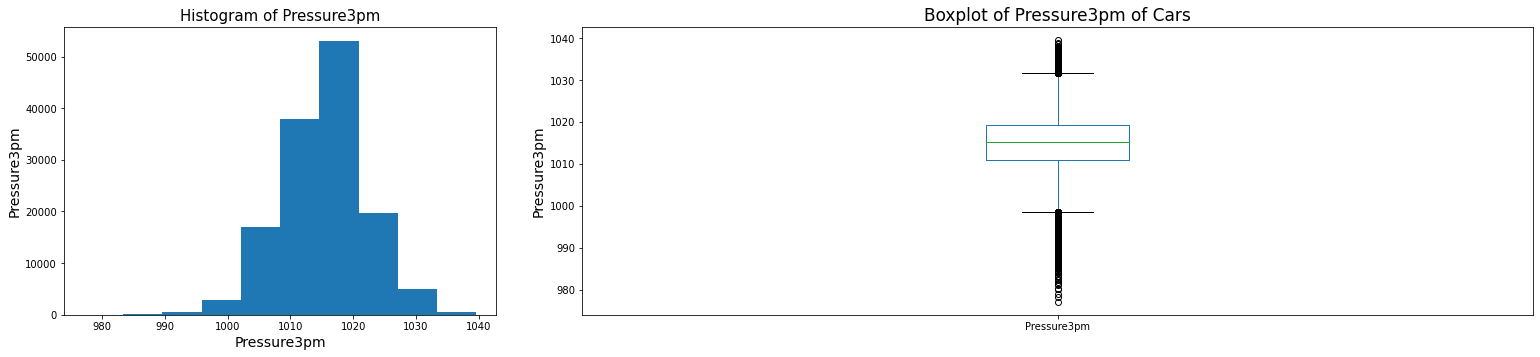

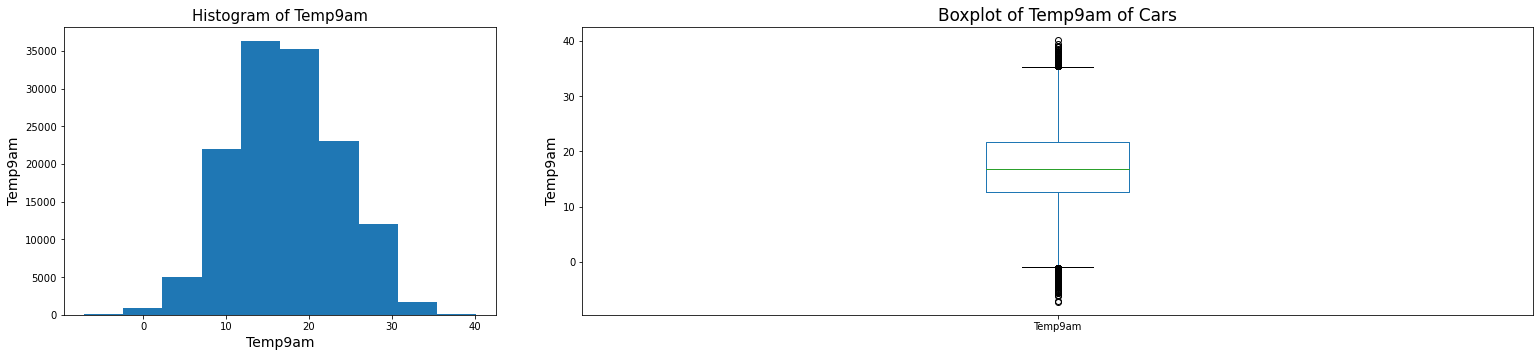

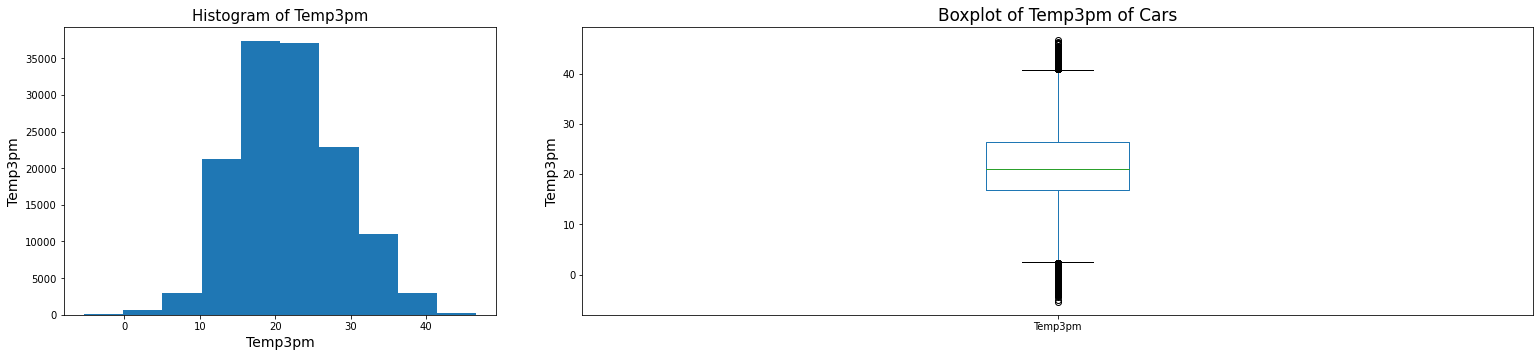

In [18]:
#For checking purpose
for j in list(df_num.columns):
        figure= plt.figure()
    
        axes1 = figure.add_axes([0, 0, 1, 1]) 
        axes2 = figure.add_axes([1.2, 0, 2.2, 1]) 

        df.hist(column=j,grid=False,figsize=(6,4),ax=axes1)
        axes1.set_title("Histogram of "+str(j), fontsize=15)         #Titile for the plot
        axes1.set_xlabel(j, fontsize=14)                                      #Axis name for x axis
        axes1.set_ylabel(str(j), fontsize=14)                                         #Axis name for y axis

        df.boxplot(column=j ,grid=False, figsize=(6,4),ax=axes2)   #To flip the figure horizondally
        axes2.set_title("Boxplot of "+str(j)+" of Cars", fontsize=17)
        axes2.set_ylabel(str(j), fontsize=14)

#### The outliers are removed from the dataset. 

Next step is to analyse the  the categorical variables.

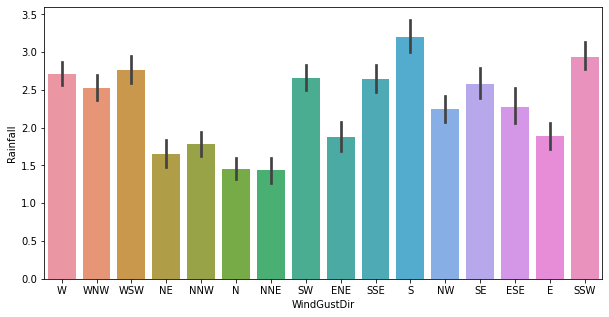

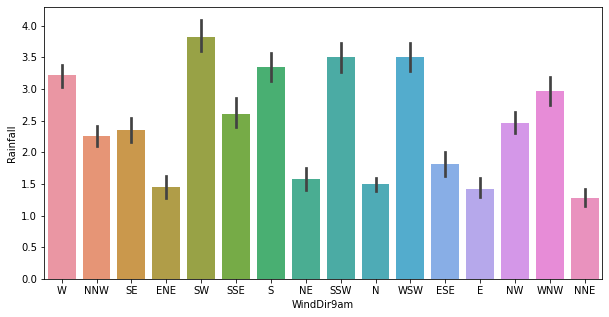

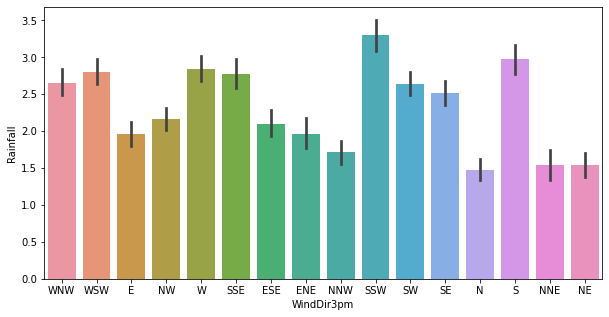

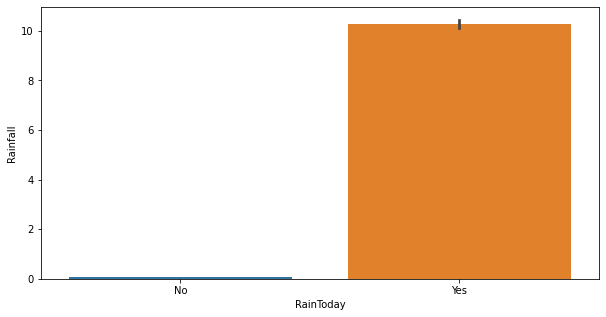

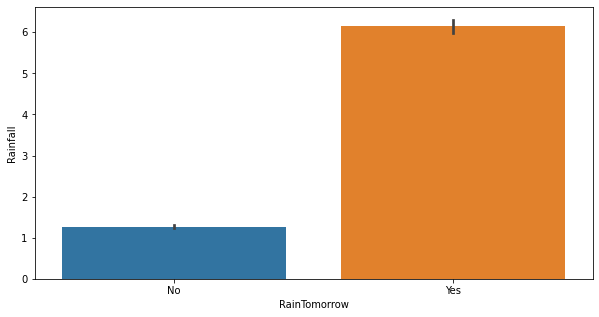

In [19]:
# Understanding the distribution of the no. of cars sold 
# in the following categories: ['fuel', 'seller_type', 'transmission', 'owner']


for i in df_cat.columns:                  #using for loop for different variables
    plt.figure(figsize=(10,5))                #to plot the figure    
    sns.barplot(data=dataset,x=i, y='Rainfall')   #Plotting the bar plot
    plt.show()



#### Bi-variate analysis

 #### Checking if humidity levels in the day impact the rain for the same day & does the humidity level of a later time of the same day impact the next day rains.

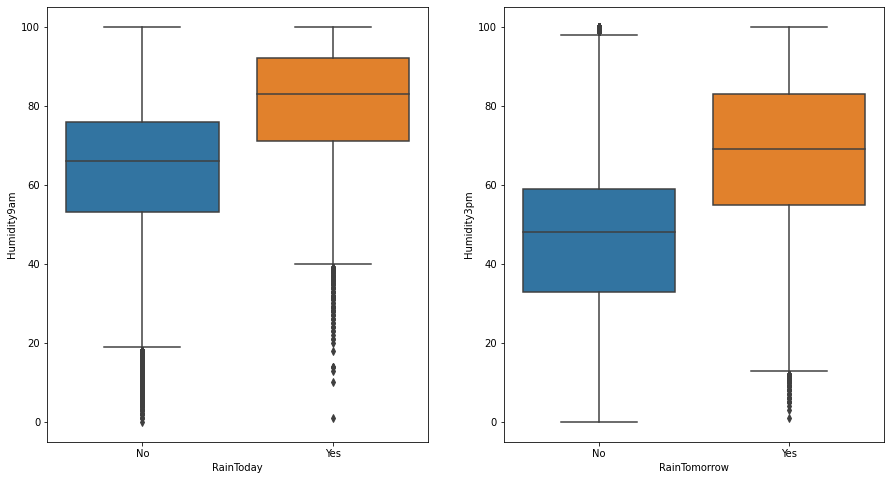

In [20]:
fig, axes = plt.subplots(nrows=1,ncols = 2, figsize = (15,8))
sns.boxplot(data = df,x = 'RainToday', y = 'Humidity9am', ax = axes[0])
sns.boxplot(data = df,x = 'RainTomorrow', y = 'Humidity3pm', ax = axes[1])
plt.show()

#### Insight:
- On an average, we can see that if the Humidity levels are between 50 - 80 in the morning there is a less chance of rain the same day.
- Similarly, if there is high humidity, we can expect the rain to pour within the same day.
- On the contrary, if the humidity level on a later time in the same day is around 35 - 60, there is a less chance of rain the next day.
- But, if there is high humidity, there is a high chance of rain

#### Analysing if the Pressure, windspeed and Temperature recorded in the day impact Rainfall in the same day

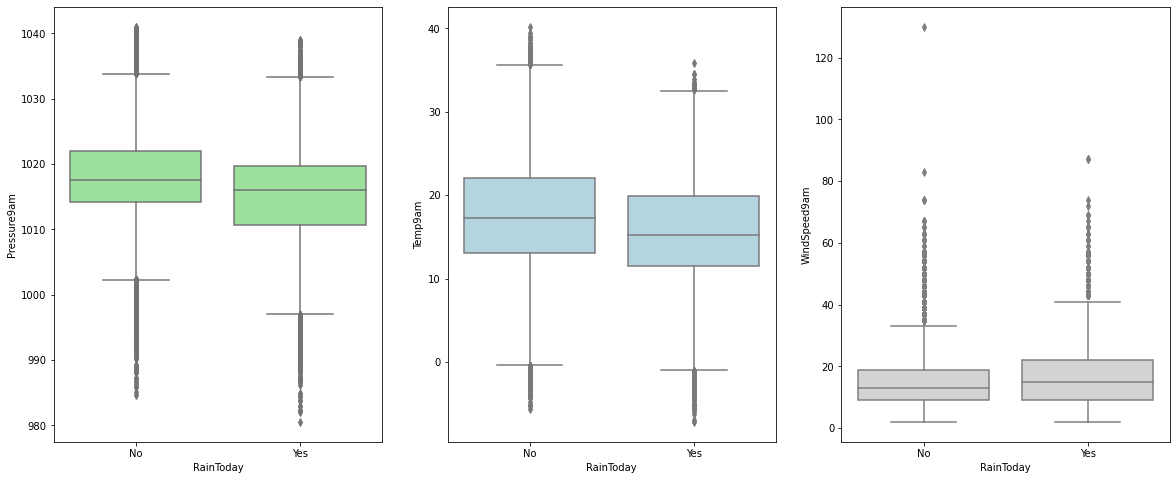

In [21]:
plt.figure(figsize = (20,8))
plt.subplot(1,3,1)
sns.boxplot(data = df, x = 'RainToday', y = 'Pressure9am',color = 'lightgreen')
plt.subplot(1,3,2)
sns.boxplot(data = df, x = 'RainToday', y = 'Temp9am',color = 'lightblue')
plt.subplot(1,3,3)
sns.boxplot(data = df, x = 'RainToday', y = 'WindSpeed9am', color = 'lightgrey')
plt.show()

#### Insight:
- For Rains to arrive on the same day, through these plots the three variables do not seem to vary much with respect to their latter.
- Almost same conditions are required by each aspect for the rains to come or not come.
- However, if looked into them closely enough, the pressure and temperature in the morning should be lower than the days when rains do not come.
- The Wind speed should be relatively higher than non rainfall days.

#### Also inspecting if the Pressure, Temperature and Windspeed recorded at a later time of the day impact the rains for the next day

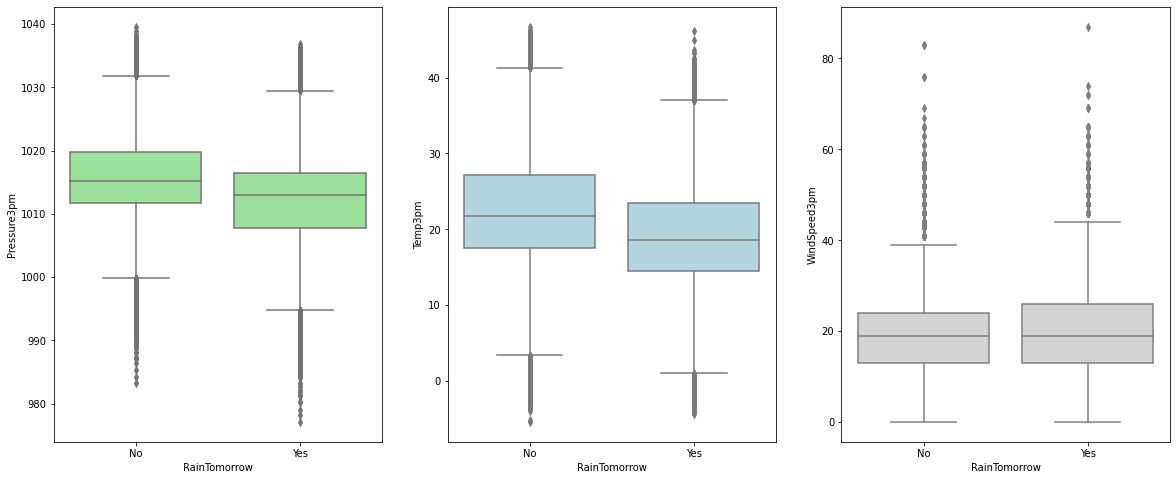

In [22]:
plt.figure(figsize = (20,8))
plt.subplot(1,3,1)
sns.boxplot(data = df, x = 'RainTomorrow', y = 'Pressure3pm',color = 'lightgreen')
plt.subplot(1,3,2)
sns.boxplot(data = df, x = 'RainTomorrow', y = 'Temp3pm',color = 'lightblue')
plt.subplot(1,3,3)
sns.boxplot(data = df, x = 'RainTomorrow', y = 'WindSpeed3pm', color = 'lightgrey')
plt.show()

#### Insight:
- Similar to the previous observation, the Pressure and temperature should be relatively lower than no rainfall days, and the windspeed should be higher than usual

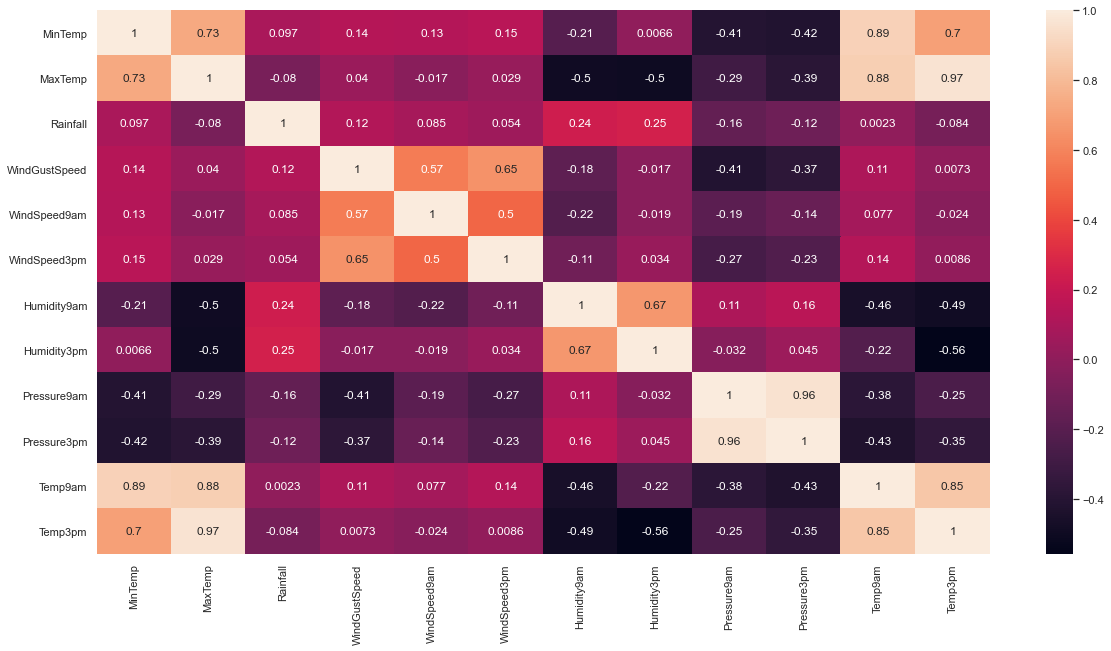

In [23]:
#Using the heatmap from seaborn library to understand the correlation amoung the variables:
sns.set()
corr = df.corr()
plt.figure(figsize=(20,10))   #initialising the figure size
sns.heatmap(corr,annot=True)  #plotting the heat map to determine correlation
plt.show()

Plotting a scatter matrix table  helps us to identify how the numeric variables are scattered inside and also to analyse the corretion type between the features.

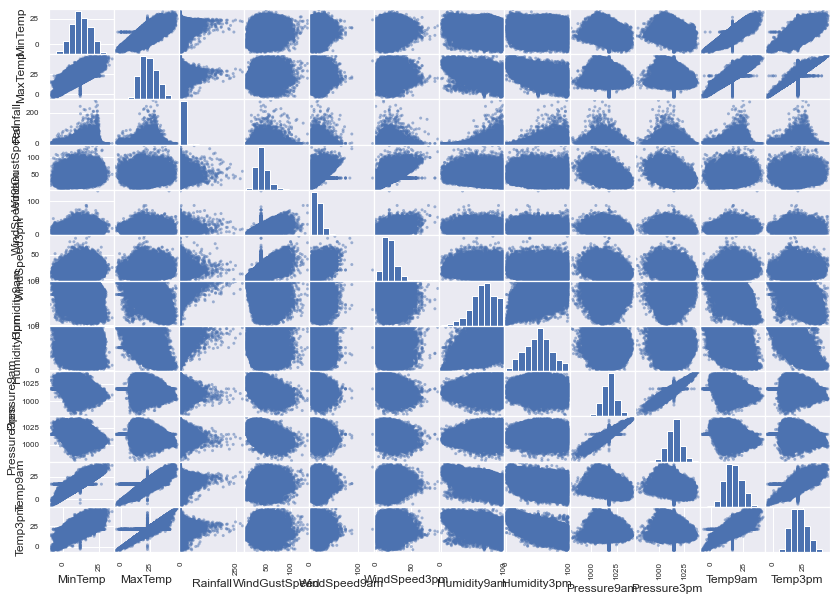

In [24]:
#Plotting the scatter matrix
from pandas.plotting import scatter_matrix  #importing the function
features = list(df_num.columns)
scatter_matrix(df[features], figsize=(14,10),diagonal='hist')
plt.show()

#### Insights

There's a significant relationship between rainfall and the humidity.

Windspeed has very less corelation with other variables in the dataset.

Most of the features are less correlated other than those metrics recorded on the same day.

In [25]:
df['RainToday_Yes'] = pd.get_dummies(df[['RainToday']] ,drop_first=True)

In [26]:
# split into train , validation and  test sets
data,test = train_test_split(df, test_size=0.185, random_state=8)
# split into train test sets
train,valid = train_test_split(data, test_size=0.225, random_state=8)
df1 =  train
print('Size of train data :' ,len(train))
print('Size of valid data :' ,len(valid))
print('Size of test data :' ,len(test))

Size of train data : 86351
Size of valid data : 25070
Size of test data : 25292


### 3. Initial model fitting setup 


Model 1 - using all the features other than the categoricals:

In [27]:
#Removing categories(except predictors):
df2 = df1.drop(['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainToday_Yes'],axis=1)

In [28]:
X = df2.drop(['RainTomorrow'],axis=1)
y = df2[['RainTomorrow']]

In [29]:

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [30]:
#Model fitting
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)
knn_pred = classifier.predict(X_test)

#Accuracy
score = accuracy_score(y_test,knn_pred)
print('Accuracy :',score)
#Confusion matrix
cm_knn = confusion_matrix(y_test, knn_pred)

cm_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
print('Confusion matrix \n',cm_matrix_knn)
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]
# print precision score

precision_knn = TP_KNN / float(TP_KNN + FP_KNN)


print('\n\n Precision : {}'.format(precision_knn))

#recall
recall_knn = TP_KNN / float(TP_KNN + FN_KNN)

print('Recall or Sensitivity : {}'.format(recall_knn))

Accuracy : 0.8268195240576689
Confusion matrix 
                     Actual Positive:1  Actual Negative:0
Predict Positive:1              12550                983
Predict Negative:0               2008               1730


 Precision : 0.9273627429247026
Recall or Sensitivity : 0.8620689655172413


As using more featured into the model, cost of the fitting the model is very high. Hence we use feature selector to determine the best features.

In [31]:
## Feauture selection:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
selector = SelectKBest(chi2, k=4)
selector.fit_transform(X, y)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm'], dtype='object')


####  Now applying the selected features into the selected model:

There is no much differnce in calculation of accuracy by not using the feauture Humidity9am.

Removing Humidity9am from the model decrease the accuracy and precison on a very minimal amount. Hence the Humidity9am feature is not considered.

In [32]:
X = df2[['Rainfall', 'WindGustSpeed','Humidity3pm']]
y = df2[['RainTomorrow']]

In [33]:
df1.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow',
       'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday_Yes'],
      dtype='object')

In [34]:
#Scaling the dataset
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [35]:
#Model fitting
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)
knn_pred = classifier.predict(X_test)

#Accuracy
score = accuracy_score(y_test,knn_pred)
print('Accuracy :',score)
#Confusion matrix
cm_knn = confusion_matrix(y_test, knn_pred)

cm_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
print('Confusion matrix \n',cm_matrix_knn)
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]
# print precision score

precision_knn = TP_KNN / float(TP_KNN + FP_KNN)


print('\n\n Precision : {}'.format(precision_knn))

#recall
recall_knn = TP_KNN / float(TP_KNN + FN_KNN)

print('Recall or Sensitivity : {}'.format(recall_knn))

Accuracy : 0.8150657170980256
Confusion matrix 
                     Actual Positive:1  Actual Negative:0
Predict Positive:1              12405               1128
Predict Negative:0               2066               1672


 Precision : 0.9166481933052538
Recall or Sensitivity : 0.8572317047888881


In [36]:
for i in range(5,21):
    #Model fitting
    print('\n\n K value =' ,i)
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train,y_train)
    knn_pred = classifier.predict(X_test)

    #Accuracy
    score = accuracy_score(y_test,knn_pred)
    #print('Accuracy :',score)
    #Confusion matrix
    cm_knn = confusion_matrix(y_test, knn_pred)

    cm_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                     index=['Predict Positive:1', 'Predict Negative:0'])
    #print('Confusion matrix \n',cm_matrix_knn)
    TP_KNN = cm_knn[0,0]
    TN_KNN = cm_knn[1,1]
    FP_KNN = cm_knn[0,1]
    FN_KNN = cm_knn[1,0]
    # print precision score

    precision_knn = TP_KNN / float(TP_KNN + FP_KNN)


    #print('\n\n Precision : {}'.format(precision_knn))

    #recall
    recall_knn = TP_KNN / float(TP_KNN + FN_KNN)

    print('\t\tAccuracy       Precision         Recall or Sensitivity \n\t\t',round(score,4),'\t' ,round(precision_knn,4),'\t\t',round(recall_knn,4))



 K value = 5
		Accuracy       Precision         Recall or Sensitivity 
		 0.8151 	 0.9166 		 0.8572


 K value = 6
		Accuracy       Precision         Recall or Sensitivity 
		 0.8234 	 0.9449 		 0.8473


 K value = 7
		Accuracy       Precision         Recall or Sensitivity 
		 0.8213 	 0.9268 		 0.8569


 K value = 8
		Accuracy       Precision         Recall or Sensitivity 
		 0.8284 	 0.9495 		 0.8492


 K value = 9
		Accuracy       Precision         Recall or Sensitivity 
		 0.8274 	 0.9361 		 0.8569


 K value = 10
		Accuracy       Precision         Recall or Sensitivity 
		 0.8301 	 0.9514 		 0.8497


 K value = 11
		Accuracy       Precision         Recall or Sensitivity 
		 0.83 	 0.9386 		 0.8578


 K value = 12
		Accuracy       Precision         Recall or Sensitivity 
		 0.8304 	 0.949 		 0.8515


 K value = 13
		Accuracy       Precision         Recall or Sensitivity 
		 0.8313 	 0.9395 		 0.8585


 K value = 14
		Accuracy       Precision         Recall or Sensitivity 
		 0.83

#### Selecting 9 as the best K value from the above results.

### Validating the model using the validation dataset:

In [37]:
X = valid[['Rainfall', 'WindGustSpeed', 'Humidity3pm']]
y = valid[['RainTomorrow']]

In [38]:
#Scaling the dataset
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [39]:
#Model fitting
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train,y_train)
knn_pred = classifier.predict(X_test)

#Accuracy
score = accuracy_score(y_test,knn_pred)
print('Accuracy :',score)
#Confusion matrix
cm_knn = confusion_matrix(y_test, knn_pred)

cm_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
print('Confusion matrix \n',cm_matrix_knn)
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]
# print precision score

precision_knn = TP_KNN / float(TP_KNN + FP_KNN)


print('\n\n Precision : {}'.format(precision_knn))

#recall
recall_knn = TP_KNN / float(TP_KNN + FN_KNN)

print('Recall or Sensitivity : {}'.format(recall_knn))

Accuracy : 0.824890307140008
Confusion matrix 
                     Actual Positive:1  Actual Negative:0
Predict Positive:1               3644                256
Predict Negative:0                622                492


 Precision : 0.9343589743589743
Recall or Sensitivity : 0.8541959681200187


Comparing the results of the train and test model:

                              Accuracy         Precision      Recall or Sensitivity
    
    Train dataset :           0.8274 	        0.9361 	    	    0.8569  
    
    Validation Dataset:       0.8248             0.9343             0.8541

### Testing the model using the test dataset:

In [40]:
X = test[['Rainfall', 'WindGustSpeed', 'Humidity3pm']]
y = test[['RainTomorrow']]

In [41]:
#Scaling the dataset
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [42]:
#Model fitting
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train,y_train)
knn_pred = classifier.predict(X_test)

#Accuracy
score = accuracy_score(y_test,knn_pred)
print('Accuracy :',score)
#Confusion matrix
cm_knn = confusion_matrix(y_test, knn_pred)

cm_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
print('Confusion matrix \n',cm_matrix_knn)
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]
# print precision score

precision_knn = TP_KNN / float(TP_KNN + FP_KNN)


print('\n\n Precision : {}'.format(precision_knn))

#recall
recall_knn = TP_KNN / float(TP_KNN + FN_KNN)

print('Recall or Sensitivity : {}'.format(recall_knn))

Accuracy : 0.8193318837714963
Confusion matrix 
                     Actual Positive:1  Actual Negative:0
Predict Positive:1               3730                200
Predict Negative:0                714                415


 Precision : 0.9491094147582697
Recall or Sensitivity : 0.8393339333933393


#### Test data results : 

Accuracy : 0.82

Precision : 0.95

Recall or Sensitivity : 0.84

### Descion Tree

In [43]:
df1 = df1.drop(['RainToday'],axis=1)

In [44]:
df1.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow', 'MinTemp',
       'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday_Yes'],
      dtype='object')

In [45]:
df1_num = df1[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm','RainToday_Yes' ]]

In [46]:
df1_cat = df1[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow']]

In [47]:
X = df1_num
y = df1_cat['RainTomorrow']

In [48]:
df1_num.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_Yes
123441,4.9,21.2,0.0,24.0,6.0,9.0,71.0,39.0,1023.2,1019.9,13.5,20.8,0
99957,13.6,24.5,0.0,43.0,26.0,30.0,68.0,46.0,1024.7,1022.7,17.9,23.0,0
96000,14.5,25.9,0.0,35.0,11.0,28.0,68.0,63.0,1021.3,1017.9,21.5,24.2,0
114211,12.6,21.3,0.2,50.0,22.0,17.0,69.0,71.0,1013.0,1011.6,19.1,18.5,0
131832,15.4,27.3,0.0,76.0,7.0,37.0,71.0,29.0,1002.6,996.1,17.3,25.4,0


## Without label encoding :

In [49]:
X = df1_num[['Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm']]

In [50]:
# feature selection usin chisquare test
selector = SelectKBest(chi2, k=5)
selector.fit_transform(X, y)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'Humidity9am',
       'Humidity3pm'],
      dtype='object')


In [51]:
#Fitting a DT Model

In [52]:
X = df1[['Rainfall', 'WindGustSpeed','WindSpeed9am','Humidity9am', 'Humidity3pm']]
y = df1[['RainTomorrow']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [53]:
#iniating the model
model1 = DecisionTreeClassifier(max_depth= 7, min_samples_leaf = 4, min_samples_split = 2)
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
score = accuracy_score(y_test,pred1)
print("Accuracy :", score)

Accuracy : 0.8337675872850443


In [54]:
#creating confusion matrix
cm_knn = confusion_matrix(y_test,pred1)
cm_knn

array([[12862,   671],
       [ 2200,  1538]], dtype=int64)

In [55]:
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]
# print precision score

precision_knn = TP_KNN / float(TP_KNN + FP_KNN)
print('Precision : {}'.format(precision_knn))
#recall
recall_knn = TP_KNN / float(TP_KNN + FN_KNN)
print('Recall or Sensitivity : {}'.format(recall_knn))

Precision : 0.9504174979679303
Recall or Sensitivity : 0.8539370601513743


### Label encoding

In [56]:
label_encoder = preprocessing.LabelEncoder()

In [57]:
df1['WindGustDir']= label_encoder.fit_transform(df1['WindGustDir'])
df1['WindDir9am']= label_encoder.fit_transform(df1['WindDir9am'])
df1['WindDir3pm']= label_encoder.fit_transform(df1['WindDir3pm'])

In [58]:
X = df1[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'RainToday_Yes']]
y = df1[['RainTomorrow']]

In [59]:
# feature selection usin chisquare test
selector = SelectKBest(chi2, k=5)
selector.fit_transform(X, y)
print(X.columns[selector.get_support(indices=True)])

# X = df1_num[scaled.columns[selector.get_support(indices=True)]]
# print(X)

Index(['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'RainToday_Yes'],
      dtype='object')


In [60]:
#Fitting a DT Model (Replacing windspeed with Raintoday variable)

In [61]:
X = df1[['Rainfall', 'WindGustSpeed','Humidity9am', 'Humidity3pm','RainToday_Yes']]
y = df1[['RainTomorrow']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [62]:
#iniating the model
model1 = DecisionTreeClassifier(max_depth= 7, min_samples_leaf = 4, min_samples_split = 2)
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
score = accuracy_score(y_test,pred1)
print("Accuracy :", score)

Accuracy : 0.8323200741126744


In [63]:
#creating confusion matrix
cm_knn = confusion_matrix(y_test,pred1)
cm_knn

array([[12783,   750],
       [ 2146,  1592]], dtype=int64)

In [64]:
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]
# print precision score

precision_knn = TP_KNN / float(TP_KNN + FP_KNN)
print('Precision : {}'.format(precision_knn))
#recall
recall_knn = TP_KNN / float(TP_KNN + FN_KNN)
print('Recall or Sensitivity : {}'.format(recall_knn))

Precision : 0.9445799157614719
Recall or Sensitivity : 0.8562529305378793


In [65]:
#Reducing the complexity of the model

In [66]:
#iniating the decsion tree
x_train = df1.drop(['RainTomorrow'],axis=1)
y_train =  df1[['RainTomorrow']]
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
#forward select method
sfs = SFS(DecisionTreeClassifier(),
                      k_features=5,
                      forward=True,
                      floating=False,
                      scoring = 'accuracy',
                      cv = 5)  
sfs.fit(x_train,y_train)
print('The Selected Features: ',sfs.k_feature_names_)
print('The Final Score: ',sfs.k_score_)

The Selected Features:  ('WindGustDir', 'WindDir3pm', 'Rainfall', 'Humidity3pm', 'RainToday_Yes')
The Final Score:  0.7873331034075584


Considering the forward selection , feature selection using chi sq value, we select the collowing features:['Rainfall', 'WindGustSpeed', 'Humidity3pm','RainToday_Yes']
    

#### Decision Tree regressor model using the Selected features

In [68]:
X = df1[['Rainfall', 'WindGustSpeed','Humidity3pm','RainToday_Yes']]
y = df1[['RainTomorrow']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [69]:
#iniating the model
model1 = DecisionTreeClassifier(max_depth=4, min_samples_leaf = 4,max_leaf_nodes=10)
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
score = accuracy_score(y_test,pred1)
print("Accuracy :", score)
#creating confusion matrix
cm_knn = confusion_matrix(y_test,pred1)
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]
# print precision score

precision_knn = TP_KNN / float(TP_KNN + FP_KNN)
print('Precision : {}'.format(precision_knn))
#recall
recall_knn = TP_KNN / float(TP_KNN + FN_KNN)
print('Recall or Sensitivity : {}'.format(recall_knn))

Accuracy : 0.8306988593596202
Precision : 0.9380033990985
Recall or Sensitivity : 0.8589214425874552


### Gridsearch to fine tune the hyperparameters

In [70]:
#gridsearch model
x = df1[['Rainfall', 'WindGustSpeed','Humidity3pm','RainToday_Yes']]
y = df1['RainTomorrow']

In [71]:
#parameter selection
param_grid = { "min_samples_leaf":[1,2,3,4,5,6,None],'max_depth' : [1,2,3,4,5,6,None]}

In [72]:
#iniating grid search
grid  = GridSearchCV(dtClassifier ,param_grid = param_grid ,cv = 5, n_jobs = -1, verbose = 0, return_train_score=True )
grid.fit(x,y)
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)
{'max_depth': 6, 'min_samples_leaf': 5}
0.8339335965108411


#### Fitting the Model and predicting the results using the calculated hyperparameters:

In [100]:
X = df1[['Rainfall', 'WindGustSpeed','Humidity3pm','RainToday_Yes']]
y = df1[['RainTomorrow']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [101]:
#iniating the model
model2 = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 5)
model2.fit(X_train,y_train)
pred1 = model2.predict(X_test)
score = accuracy_score(y_test,pred1)
print("Accuracy :", score)
#creating confusion matrix
cm_knn = confusion_matrix(y_test,pred1)
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]
# print precision score

precision_knn = TP_KNN / float(TP_KNN + FP_KNN)
print('Precision : {}'.format(precision_knn))
#recall
recall_knn = TP_KNN / float(TP_KNN + FN_KNN)
print('Recall or Sensitivity : {}'.format(recall_knn))

Accuracy : 0.8361415088877309
Precision : 0.9515258996527008
Recall or Sensitivity : 0.8555577702478241


### Pruning the Model after growing it to fullest depth to interpret if the designed model is overfitted or not

In [114]:
X = df1[['Rainfall', 'WindGustSpeed','Humidity3pm','RainToday_Yes']]
y = df1[['RainTomorrow']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [115]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
clf =model2

In [116]:
## FIND Best Alpha by Cost complexity pruning path

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [117]:
#Print the Alpha values
ccp_alphas

array([0.        , 0.        , 0.        , ..., 0.00805788, 0.00946258,
       0.05983364])

In [118]:
#FIT THE DECISION TREE CLASSIFIERS FOR EACH ALPHA
clfs = [] #classifiers

for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 100, ccp_alpha = i)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs

#print("no. of last node in the tree is : {} with CCP alpha : {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

[DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTreeClassifier(random_state=100),
 DecisionTr

In [123]:
#tEST THE ACCURACY SCORES FOR EACH CLASSIFIERS
test_scores=[]

for clf in clfs:
    p = [clf.score(X_test, y_test)]
    test_scores.append(p)

test_scores

[[0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124601933877],
 [0.8088124

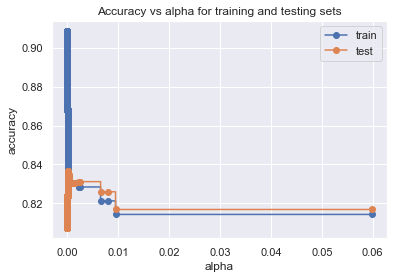

In [124]:
#PLOT IT

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()

ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")

ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")

ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")

ax.legend()
plt.show()

In [134]:
# Fit the decision tree with best alpha value of 0.002.(Choosing the lesser cost of fitting the model)
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [135]:
#Predict using the same model
pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8168606334317642

The Accuracy Obtained by pruning the model is 0.82 which is similar to the model which is fitted using grid search.

###  Validating the model:


In [76]:
# Model Validating result
X = valid[['Rainfall', 'WindGustSpeed','Humidity3pm','RainToday_Yes']]
y = valid['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [77]:
#iniating the model
model3 = DecisionTreeClassifier(max_depth=5, min_samples_leaf = 5)
model3.fit(X_train,y_train)
pred2 = model3.predict(X_test)
score = accuracy_score(y_test,pred2)
print("Accuracy :", score)
#creating confusion matrix
cm_knn = confusion_matrix(y_test,pred2)
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]
# print precision score

precision_knn = TP_KNN / float(TP_KNN + FP_KNN)
print('Precision : {}'.format(precision_knn))
#recall
recall_knn = TP_KNN / float(TP_KNN + FN_KNN)
print('Recall or Sensitivity : {}'.format(recall_knn))

Accuracy : 0.8284802552852014
Precision : 0.9558974358974359
Recall or Sensitivity : 0.8442028985507246


## Testing the model:

In [78]:
# Model Validating result
X = test[['Rainfall', 'WindGustSpeed','Humidity3pm','RainToday_Yes']]
y = test['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [81]:
#iniating the model
model5 = DecisionTreeClassifier(max_depth=5, min_samples_leaf = 5)
model5.fit(X_train,y_train)
pred1 = model5.predict(X_test)
score = accuracy_score(y_test,pred1)
print("Accuracy :", score)
#creating confusion matrix
cm_knn = confusion_matrix(y_test,pred1)
TP_KNN = cm_knn[0,0]
TN_KNN = cm_knn[1,1]
FP_KNN = cm_knn[0,1]
FN_KNN = cm_knn[1,0]
# print precision score

precision_knn = TP_KNN / float(TP_KNN + FP_KNN)
print('Precision : {}'.format(precision_knn))
#recall
recall_knn = TP_KNN / float(TP_KNN + FN_KNN)
print('Recall or Sensitivity : {}'.format(recall_knn))

Accuracy : 0.8329709428740858
Precision : 0.9557251908396946
Recall or Sensitivity : 0.8484300880957759


### Comparision of both models:

In [82]:
comparison = {'Model': ['Decision Tree', 'K-Nearest Neighbor'],\
              'Accuracy': [0.84,0.82],\
              'Precision':[0.95,0.95],\
              'Recall':[0.86,0.84]}
pd.DataFrame.from_dict(comparison)

,Model,Accuracy,Precision,Recall
0,Decision Tree,0.84,0.95,0.86
1,K-Nearest Neighbor,0.82,0.95,0.84
